#Loading the datasets

I have downloaded the relevant datasets and then uploaded them to my drive, here I will be importing them to this colab notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
iris = pd.read_csv("/content/drive/MyDrive/iris.csv")
diabetes = pd.read_csv("/content/drive/MyDrive/diabetes_tab_separated.txt",delimiter="\t")
breast_cancer = pd.read_csv("/content/drive/MyDrive/breast-cancer-wisconsin.csv")

In [3]:
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

In [4]:
diabetes.head(10)

AGE  SEX   BMI     BP   S1     S2    S3    S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.00  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.00  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.00  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.00  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.00  4.2905  80  135
5   23    1  22.6   89.0  139   64.8  61.0  2.00  4.1897  68   97
6   36    2  22.0   90.0  160   99.6  50.0  3.00  3.9512  82  138
7   66    2  26.2  114.0  255  185.0  56.0  4.55  4.2485  92   63
8   60    2  32.1   83.0  179  119.4  42.0  4.00  4.4773  94  110
9   29    1  30.0   85.0  180   93.4  43.0  4.00  5.3845  88  310

In [5]:
breast_cancer.head(10)

sample_number  clump_thickness  cell_size  ...  normal_nucleoli  mitoses  class
0        1000025                5          1  ...                1        1      2
1        1002945                5          4  ...                2        1      2
2        1015425                3          1  ...                1        1      2
3        1016277                6          8  ...                7        1      2
4        1017023                4          1  ...                1        1      2
5        1017122                8         10  ...                7        1      4
6        1018099                1          1  ...                1        1      2
7        1018561                2          1  ...                1        1      2
8        1033078                2          1  ...                1        5      2
9        1033078                4          2  ...                1        1      2

[10 rows x 11 columns]

In breast cancer dataset in the class column 2 stands for benign and 4 stands for malignant

In [6]:
breast_cancer["category"] = breast_cancer["class"].map(lambda num: "benign" if num == 2 else "malignant")

In [7]:
breast_cancer.head(10)

sample_number  clump_thickness  cell_size  ...  mitoses  class   category
0        1000025                5          1  ...        1      2     benign
1        1002945                5          4  ...        1      2     benign
2        1015425                3          1  ...        1      2     benign
3        1016277                6          8  ...        1      2     benign
4        1017023                4          1  ...        1      2     benign
5        1017122                8         10  ...        1      4  malignant
6        1018099                1          1  ...        1      2     benign
7        1018561                2          1  ...        1      2     benign
8        1033078                2          1  ...        5      2     benign
9        1033078                4          2  ...        1      2     benign

[10 rows x 12 columns]

#Imports

In [8]:
import numpy as np
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer,load_diabetes,load_iris

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
from sklearn.decomposition import PCA

In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [54]:
from sklearn import tree

#Iris Dataset

In [13]:
iris_data = iris[["sepal_length","sepal_width","petal_length","petal_width"]].values

In [14]:
def classNumberIris(iris_ds):
  if(iris_ds["class"] == "Iris-versicolor"):
    return 1
  elif(iris_ds["class"] == "Iris-setosa"):
    return 0
  return 2
iris["class_number"] = iris.apply(classNumberIris, axis="columns")

In [15]:
iris_data_values = iris["class_number"].values

In [16]:
iris_categories = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

In [17]:
iris_X_train,iris_X_test,iris_y_train,iris_y_test = train_test_split(iris_data,iris_data_values,test_size=0.25)

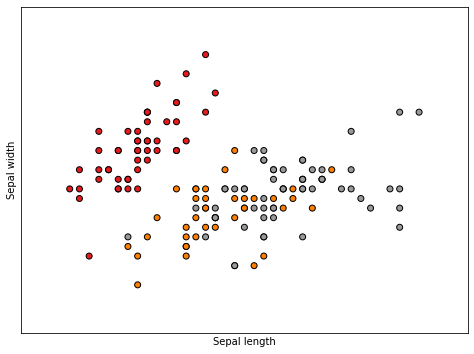

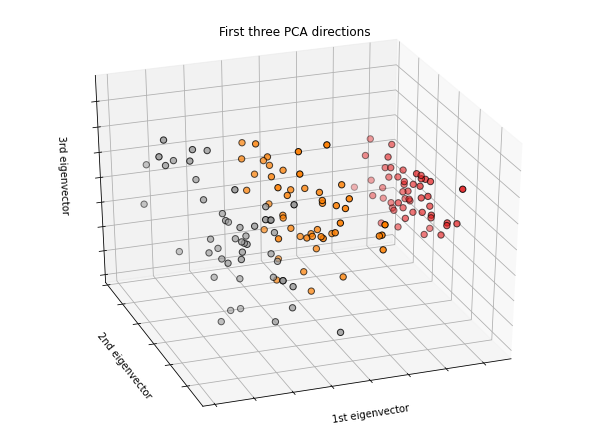

In [18]:
#Source taken from https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

iris_graph_x = load_iris().data[:,:2]
iris_graph_y = load_iris().target
iris_x_min, iris_x_max = iris_graph_x[:, 0].min() - .5, iris_graph_x[:, 0].max() + .5
iris_y_min, iris_y_max = iris_graph_x[:, 1].min() - .5, iris_graph_x[:, 1].max() + .5
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(iris_graph_x[:, 0], iris_graph_x[:, 1], c=iris_graph_y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(iris_x_min, iris_x_max)
plt.ylim(iris_y_min, iris_y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
iris_X_reduced = PCA(n_components=3).fit_transform(load_iris().data)
ax.scatter(iris_X_reduced[:, 0], iris_X_reduced[:, 1], iris_X_reduced[:, 2], c=iris_graph_y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#Naive Bayes Iris Dataset

**Without Parameter Tuning Naive Bayes Classification(Gaussian,Multinomial,Bernoulli)**

In [19]:
iris_gnb = GaussianNB()
iris_gnb.fit(iris_X_train,iris_y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
iris_multi = MultinomialNB()
iris_multi.fit(iris_X_train,iris_y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
iris_bern = BernoulliNB()
iris_bern.fit(iris_X_train,iris_y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [22]:
iris_gnb_pred = iris_gnb.predict(iris_X_test)
iris_multinb_pred = iris_multi.predict(iris_X_test)
iris_bernnb_pred = iris_bern.predict(iris_X_test)

Confusion Matrices

In [23]:
confusion_matrix(iris_y_test,iris_gnb_pred)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 10]])

In [24]:
confusion_matrix(iris_y_test,iris_multinb_pred)

array([[12,  0,  0],
       [ 0,  8,  6],
       [ 0,  0, 12]])

In [25]:
confusion_matrix(iris_y_test,iris_bernnb_pred)

array([[12,  0,  0],
       [14,  0,  0],
       [12,  0,  0]])

Recall Score

In [26]:
print(f"Micro recall score gaussian naive bayes {recall_score(iris_y_test,iris_gnb_pred,average='micro')}")
print(f"Macro recall score gaussian naive bayes {recall_score(iris_y_test,iris_gnb_pred,average='macro')}")
print(f"Weighted recall score gaussian naive bayes {recall_score(iris_y_test,iris_gnb_pred,average='weighted')}")
print(f"None recall score average {recall_score(iris_y_test,iris_gnb_pred,average=None)}")
print(f"Micro recall score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='micro')}")
print(f"Macro recall score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='macro')}")
print(f"Weighted recall score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='weighted')}")
print(f"None recall score average {recall_score(iris_y_test,iris_multinb_pred,average=None)}")
print(f"Micro recall score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='micro')}")
print(f"Macro recall score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='macro')}")
print(f"Weighted recall score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='weighted')}")
print(f"None recall score average {recall_score(iris_y_test,iris_bernnb_pred,average=None)}")

Micro recall score gaussian naive bayes 0.9473684210526315
Macro recall score gaussian naive bayes 0.9444444444444445
Weighted recall score gaussian naive bayes 0.9473684210526315
None recall score average [1.         1.         0.83333333]
Micro recall score multinomial naive bayes 0.8421052631578947
Macro recall score multinomial naive bayes 0.8571428571428571
Weighted recall score multinomial naive bayes 0.8421052631578947
None recall score average [1.         0.57142857 1.        ]
Micro recall score bernoulli naive bayes 0.3157894736842105
Macro recall score bernoulli naive bayes 0.3333333333333333
Weighted recall score bernoulli naive bayes 0.3157894736842105
None recall score average [1. 0. 0.]


F1 score

In [27]:
print(f"Micro f1 score gaussian naive bayes {f1_score(iris_y_test,iris_gnb_pred,average='micro')}")
print(f"Macro f1 score gaussian naive bayes {f1_score(iris_y_test,iris_gnb_pred,average='macro')}")
print(f"Weighted f1 score gaussian naive bayes {f1_score(iris_y_test,iris_gnb_pred,average='weighted')}")
print(f"None average gaussian {f1_score(iris_y_test,iris_gnb_pred,average=None)}")
print(f"Micro f1 score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='micro')}")
print(f"Macro f1 score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='macro')}")
print(f"Weighted f1 score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='weighted')}")
print(f"None f1 score average multinomial {recall_score(iris_y_test,iris_multinb_pred,average=None)}")
print(f"Micro f1 score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='micro')}")
print(f"Macro f1 score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='macro')}")
print(f"Weighted f1 score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='weighted')}")
print(f"None f1 score average bernoulli {recall_score(iris_y_test,iris_bernnb_pred,average=None)}")

Micro f1 score gaussian naive bayes 0.9473684210526315
Macro f1 score gaussian naive bayes 0.9474747474747475
Weighted f1 score gaussian naive bayes 0.9467304625199362
None average gaussian [1.         0.93333333 0.90909091]
Micro f1 score multinomial naive bayes 0.8421052631578947
Macro f1 score multinomial naive bayes 0.8571428571428571
Weighted f1 score multinomial naive bayes 0.8421052631578947
None f1 score average multinomial [1.         0.57142857 1.        ]
Micro f1 score bernoulli naive bayes 0.3157894736842105
Macro f1 score bernoulli naive bayes 0.3333333333333333
Weighted f1 score bernoulli naive bayes 0.3157894736842105
None f1 score average bernoulli [1. 0. 0.]


Accuracy and Precision Score

In [28]:
print(f"ACCURACY SCORE GAUSSIAN {accuracy_score(iris_y_test,iris_gnb_pred)}")
print(f"ACCURACY SCORE MULTINOMIAL {accuracy_score(iris_y_test,iris_multinb_pred)}")
print(f"ACCURACY SCORE BERNOULLI {accuracy_score(iris_y_test,iris_bernnb_pred)}")

ACCURACY SCORE GAUSSIAN 0.9473684210526315
ACCURACY SCORE MULTINOMIAL 0.8421052631578947
ACCURACY SCORE BERNOULLI 0.3157894736842105


In [29]:
print(f"Micro precision score gaussian naive bayes {precision_score(iris_y_test,iris_gnb_pred,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(iris_y_test,iris_gnb_pred,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(iris_y_test,iris_gnb_pred,average='weighted')}")
print(f"None precision score average {precision_score(iris_y_test,iris_gnb_pred,average=None)}")
print(f"Micro precision score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='micro')}")
print(f"Macro precision score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred,average='weighted')}")
print(f"None precision score average multinomial {recall_score(iris_y_test,iris_multinb_pred,average=None)}")
print(f"Micro precision score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred,average='weighted')}")
print(f"None precision score average bernoulli {recall_score(iris_y_test,iris_bernnb_pred,average=None)}")

Micro precision score gaussian naive bayes 0.9473684210526315
Macro precision score gaussian naive bayes 0.9583333333333334
Weighted precision score gaussian naive bayes 0.9539473684210527
None precision score average [1.    0.875 1.   ]
Micro precision score multinomial naive bayes 0.8421052631578947
Macro precision score multinomial naive bayes 0.8571428571428571
Weighted precision score multinomial naive bayes 0.8421052631578947
None precision score average multinomial [1.         0.57142857 1.        ]
Micro precision score bernoulli naive bayes 0.3157894736842105
Macro precision score bernoulli naive bayes 0.3333333333333333
Weighted precision score bernoulli naive bayes 0.3157894736842105
None precision score average bernoulli [1. 0. 0.]


**With Parameter Tuning**

In [30]:
iris["class_number"].value_counts()

2    50
1    50
0    50
Name: class_number, dtype: int64

In [31]:
#Since count is equal probability = [0.333,0.333,0.333]
priors_NB = np.array([0.33333,0.333333,0.333333])

In [32]:
iris_gnb_tuned = GaussianNB(priors=priors_NB,var_smoothing=1e-05)
iris_gnb_tuned.fit(iris_X_train,iris_y_train)

GaussianNB(priors=array([0.33333 , 0.333333, 0.333333]), var_smoothing=1e-05)

In [33]:
iris_multi_tuned = MultinomialNB(class_prior=priors_NB,fit_prior=False,alpha=0.8)
iris_multi_tuned.fit(iris_X_train,iris_y_train)

MultinomialNB(alpha=0.8, class_prior=array([0.33333 , 0.333333, 0.333333]),
              fit_prior=False)

In [34]:
iris_bern_tuned = BernoulliNB(class_prior=priors_NB,fit_prior=False,alpha=0.8,binarize=0.33)
iris_bern_tuned.fit(iris_X_train,iris_y_train)

BernoulliNB(alpha=0.8, binarize=0.33,
            class_prior=array([0.33333 , 0.333333, 0.333333]), fit_prior=False)

In [35]:
iris_gnb_pred_tune = iris_gnb.predict(iris_X_test)
iris_multinb_pred_tune = iris_multi.predict(iris_X_test)
iris_bernnb_pred_tune = iris_bern.predict(iris_X_test)

Confusion Matrix

In [36]:
confusion_matrix(iris_y_test,iris_gnb_pred_tune)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 10]])

In [37]:
confusion_matrix(iris_y_test,iris_multinb_pred_tune)

array([[12,  0,  0],
       [ 0,  8,  6],
       [ 0,  0, 12]])

In [38]:
confusion_matrix(iris_y_test,iris_bernnb_pred_tune)

array([[12,  0,  0],
       [14,  0,  0],
       [12,  0,  0]])

Recall Score

In [39]:
print(f"Micro recall score gaussian naive bayes {recall_score(iris_y_test,iris_gnb_pred_tune,average='micro')}")
print(f"Macro recall score gaussian naive bayes {recall_score(iris_y_test,iris_gnb_pred_tune,average='macro')}")
print(f"Weighted recall score gaussian naive bayes {recall_score(iris_y_test,iris_gnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(iris_y_test,iris_gnb_pred_tune,average=None)}")
print(f"Micro recall score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='micro')}")
print(f"Macro recall score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='macro')}")
print(f"Weighted recall score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(iris_y_test,iris_multinb_pred_tune,average=None)}")
print(f"Micro recall score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='micro')}")
print(f"Macro recall score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='macro')}")
print(f"Weighted recall score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(iris_y_test,iris_bernnb_pred_tune,average=None)}")

Micro recall score gaussian naive bayes 0.9473684210526315
Macro recall score gaussian naive bayes 0.9444444444444445
Weighted recall score gaussian naive bayes 0.9473684210526315
None recall score average [1.         1.         0.83333333]
Micro recall score multinomial naive bayes 0.8421052631578947
Macro recall score multinomial naive bayes 0.8571428571428571
Weighted recall score multinomial naive bayes 0.8421052631578947
None recall score average [1.         0.57142857 1.        ]
Micro recall score bernoulli naive bayes 0.3157894736842105
Macro recall score bernoulli naive bayes 0.3333333333333333
Weighted recall score bernoulli naive bayes 0.3157894736842105
None recall score average [1. 0. 0.]


F1 score

In [40]:
print(f"Micro f1 score gaussian naive bayes {f1_score(iris_y_test,iris_gnb_pred_tune,average='micro')}")
print(f"Macro f1 score gaussian naive bayes {f1_score(iris_y_test,iris_gnb_pred_tune,average='macro')}")
print(f"Weighted f1 score gaussian naive bayes {f1_score(iris_y_test,iris_gnb_pred_tune,average='weighted')}")
print(f"None average gaussian {f1_score(iris_y_test,iris_gnb_pred_tune,average=None)}")
print(f"Micro f1 score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='micro')}")
print(f"Macro f1 score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='macro')}")
print(f"Weighted f1 score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='weighted')}")
print(f"None f1 score average multinomial {recall_score(iris_y_test,iris_multinb_pred_tune,average=None)}")
print(f"Micro f1 score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='micro')}")
print(f"Macro f1 score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='macro')}")
print(f"Weighted f1 score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='weighted')}")
print(f"None f1 score average bernoulli {recall_score(iris_y_test,iris_bernnb_pred_tune,average=None)}")

Micro f1 score gaussian naive bayes 0.9473684210526315
Macro f1 score gaussian naive bayes 0.9474747474747475
Weighted f1 score gaussian naive bayes 0.9467304625199362
None average gaussian [1.         0.93333333 0.90909091]
Micro f1 score multinomial naive bayes 0.8421052631578947
Macro f1 score multinomial naive bayes 0.8571428571428571
Weighted f1 score multinomial naive bayes 0.8421052631578947
None f1 score average multinomial [1.         0.57142857 1.        ]
Micro f1 score bernoulli naive bayes 0.3157894736842105
Macro f1 score bernoulli naive bayes 0.3333333333333333
Weighted f1 score bernoulli naive bayes 0.3157894736842105
None f1 score average bernoulli [1. 0. 0.]


Accuracy and precision Score

In [41]:
print(f"ACCURACY SCORE GAUSSIAN {accuracy_score(iris_y_test,iris_gnb_pred_tune)}")
print(f"ACCURACY SCORE MULTINOMIAL {accuracy_score(iris_y_test,iris_multinb_pred_tune)}")
print(f"ACCURACY SCORE BERNOULLI {accuracy_score(iris_y_test,iris_bernnb_pred_tune)}")

ACCURACY SCORE GAUSSIAN 0.9473684210526315
ACCURACY SCORE MULTINOMIAL 0.8421052631578947
ACCURACY SCORE BERNOULLI 0.3157894736842105


In [42]:
print(f"Micro precision score gaussian naive bayes {precision_score(iris_y_test,iris_gnb_pred_tune,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(iris_y_test,iris_gnb_pred_tune,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(iris_y_test,iris_gnb_pred_tune,average='weighted')}")
print(f"None precision score average {precision_score(iris_y_test,iris_gnb_pred_tune,average=None)}")
print(f"Micro precision score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='micro')}")
print(f"Macro precision score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {recall_score(iris_y_test,iris_multinb_pred_tune,average='weighted')}")
print(f"None precision score average multinomial {recall_score(iris_y_test,iris_multinb_pred_tune,average=None)}")
print(f"Micro precision score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {recall_score(iris_y_test,iris_bernnb_pred_tune,average='weighted')}")
print(f"None precision score average bernoulli {recall_score(iris_y_test,iris_bernnb_pred_tune,average=None)}")

Micro precision score gaussian naive bayes 0.9473684210526315
Macro precision score gaussian naive bayes 0.9583333333333334
Weighted precision score gaussian naive bayes 0.9539473684210527
None precision score average [1.    0.875 1.   ]
Micro precision score multinomial naive bayes 0.8421052631578947
Macro precision score multinomial naive bayes 0.8571428571428571
Weighted precision score multinomial naive bayes 0.8421052631578947
None precision score average multinomial [1.         0.57142857 1.        ]
Micro precision score bernoulli naive bayes 0.3157894736842105
Macro precision score bernoulli naive bayes 0.3333333333333333
Weighted precision score bernoulli naive bayes 0.3157894736842105
None precision score average bernoulli [1. 0. 0.]


#Decision Tree Classifier Iris Dataset

**Without parameter tuning gini**

In [43]:
iris_clf_non_tune = DecisionTreeClassifier(random_state=0)

In [44]:
iris_clf_non_tune.fit(iris_X_train,iris_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [45]:
iris_non_tune_pred = iris_clf_non_tune.predict(iris_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [47]:
confusion_matrix(iris_y_test,iris_non_tune_pred)

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 11]])

In [48]:
print(f"Micro recall score gini decision tree nontuned {recall_score(iris_y_test,iris_non_tune_pred,average='micro')}")
print(f"Macro recall score gini decision tree nontuned {recall_score(iris_y_test,iris_non_tune_pred,average='macro')}")
print(f"Weighted recall score gini decision tree nontuned {recall_score(iris_y_test,iris_non_tune_pred,average='weighted')}")
print(f"None recall score gini decision tree nontuned {recall_score(iris_y_test,iris_non_tune_pred,average=None)}")

Micro recall score gini decision tree nontuned 0.9210526315789473
Macro recall score gini decision tree nontuned 0.9246031746031745
Weighted recall score gini decision tree nontuned 0.9210526315789473
None recall score gini decision tree nontuned [1.         0.85714286 0.91666667]


In [49]:
print(f"Micro f1 score gini decision tree nontuned {f1_score(iris_y_test,iris_non_tune_pred,average='micro')}")
print(f"Macro f1 score gini decision tree nontuned {f1_score(iris_y_test,iris_non_tune_pred,average='macro')}")
print(f"Weighted f1 score gini decision tree nontuned {f1_score(iris_y_test,iris_non_tune_pred,average='weighted')}")
print(f"None average gini decision tree nontuned {f1_score(iris_y_test,iris_non_tune_pred,average=None)}")

Micro f1 score gini decision tree nontuned 0.9210526315789473
Macro f1 score gini decision tree nontuned 0.9229629629629629
Weighted f1 score gini decision tree nontuned 0.9211695906432749
None average gini decision tree nontuned [1.         0.88888889 0.88      ]


In [50]:
print(f"ACCURACY SCORE GINI NON TUNED {accuracy_score(iris_y_test,iris_non_tune_pred)}")

ACCURACY SCORE GINI NON TUNED 0.9210526315789473


In [51]:
print(f"Micro precision score gini decision tree nontuned {precision_score(iris_y_test,iris_non_tune_pred,average='micro')}")
print(f"Macro precision score gini decision tree nontuned {precision_score(iris_y_test,iris_non_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision tree nontuned {precision_score(iris_y_test,iris_non_tune_pred,average='weighted')}")
print(f"None precision score gini decision tree nontuned {precision_score(iris_y_test,iris_non_tune_pred,average=None)}")

Micro precision score gini decision tree nontuned 0.9210526315789473
Macro precision score gini decision tree nontuned 0.923076923076923
Weighted precision score gini decision tree nontuned 0.9230769230769231
None precision score gini decision tree nontuned [1.         0.92307692 0.84615385]


[Text(111.60000000000001, 199.32, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [38, 36, 38]'),
 Text(55.800000000000004, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(111.60000000000001, 126.83999999999999, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X[2] <= 5.05\ngini = 0.172\nsamples = 42\nvalue = [0, 4, 38]'),
 Text(167.4, 90.6, 'X[0] <= 6.5\ngini = 0.48\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(111.60000000000001, 54.359999999999985, 'X[1] <= 3.1\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(55.800000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(279.0, 90.6, 'gini = 0.0\nsamples = 32\n

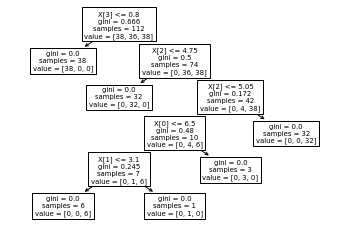

In [55]:
tree.plot_tree(iris_clf_non_tune)

**Without parameter tuning entropy**

In [56]:
iris_clf_en_non_tune = DecisionTreeClassifier(random_state=0,criterion="entropy")

In [58]:
iris_clf_en_non_tune.fit(iris_X_train,iris_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
iris_en_non_tune_pred = iris_clf_en_non_tune.predict(iris_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score


In [60]:
confusion_matrix(iris_y_test,iris_en_non_tune_pred)

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 11]])

In [61]:
print(f"Micro recall score entropy decision tree nontuned {recall_score(iris_y_test,iris_en_non_tune_pred,average='micro')}")
print(f"Macro recall score entropy decision tree nontuned {recall_score(iris_y_test,iris_en_non_tune_pred,average='macro')}")
print(f"Weighted recall score entropy decision tree nontuned {recall_score(iris_y_test,iris_en_non_tune_pred,average='weighted')}")
print(f"None recall score entropy decision tree nontuned {recall_score(iris_y_test,iris_en_non_tune_pred,average=None)}")

Micro recall score entropy decision tree nontuned 0.9210526315789473
Macro recall score entropy decision tree nontuned 0.9246031746031745
Weighted recall score entropy decision tree nontuned 0.9210526315789473
None recall score entropy decision tree nontuned [1.         0.85714286 0.91666667]


In [62]:
print(f"Micro f1 score entropy decision tree nontuned {f1_score(iris_y_test,iris_en_non_tune_pred,average='micro')}")
print(f"Macro f1 score entropy decision tree nontuned {f1_score(iris_y_test,iris_en_non_tune_pred,average='macro')}")
print(f"Weighted f1 score entropy decision tree nontuned {f1_score(iris_y_test,iris_en_non_tune_pred,average='weighted')}")
print(f"None average entropy decision tree nontuned {f1_score(iris_y_test,iris_en_non_tune_pred,average=None)}")

Micro f1 score entropy decision tree nontuned 0.9210526315789473
Macro f1 score entropy decision tree nontuned 0.9229629629629629
Weighted f1 score entropy decision tree nontuned 0.9211695906432749
None average entropy decision tree nontuned [1.         0.88888889 0.88      ]


In [63]:
print(f"ACCURACY SCORE ENTROPY NON TUNED {accuracy_score(iris_y_test,iris_en_non_tune_pred)}")

ACCURACY SCORE ENTROPY NON TUNED 0.9210526315789473


In [64]:
print(f"Micro precision score entropy decision tree nontuned {precision_score(iris_y_test,iris_en_non_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision tree nontuned {precision_score(iris_y_test,iris_en_non_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision tree nontuned {precision_score(iris_y_test,iris_en_non_tune_pred,average='weighted')}")
print(f"None precision score entropy decision tree nontuned {precision_score(iris_y_test,iris_en_non_tune_pred,average=None)}")

Micro precision score entropy decision tree nontuned 0.9210526315789473
Macro precision score entropy decision tree nontuned 0.923076923076923
Weighted precision score entropy decision tree nontuned 0.9230769230769231
None precision score entropy decision tree nontuned [1.         0.92307692 0.84615385]


[Text(111.60000000000001, 199.32, 'X[3] <= 0.8\nentropy = 1.584\nsamples = 112\nvalue = [38, 36, 38]'),
 Text(55.800000000000004, 163.07999999999998, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 4.75\nentropy = 0.999\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(111.60000000000001, 126.83999999999999, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X[2] <= 5.05\nentropy = 0.454\nsamples = 42\nvalue = [0, 4, 38]'),
 Text(167.4, 90.6, 'X[0] <= 6.5\nentropy = 0.971\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(111.60000000000001, 54.359999999999985, 'X[1] <= 3.1\nentropy = 0.592\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(55.800000000000004, 18.119999999999976, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(167.4, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(279.0, 

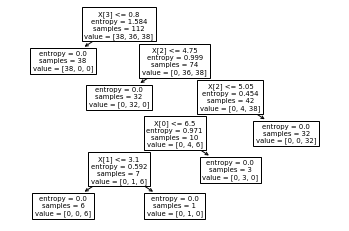

In [67]:
tree.plot_tree(iris_clf_en_non_tune)

**With Parameter tuned Gini**

In [68]:
iris_clf_tuned = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=100,min_samples_split=3,min_samples_leaf=2,random_state=0,max_leaf_nodes=100)

In [70]:
iris_clf_tuned.fit(iris_X_train,iris_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [72]:
iris_tune_pred = iris_clf_tuned.predict(iris_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [73]:
confusion_matrix(iris_y_test,iris_tune_pred)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 10]])

In [79]:
print(f"Micro recall score gini decision tuned {recall_score(iris_y_test,iris_tune_pred,average='micro')}")
print(f"Macro recall score gini decision tuned {recall_score(iris_y_test,iris_tune_pred,average='macro')}")
print(f"Weighted recall score gini decision tuned {recall_score(iris_y_test,iris_tune_pred,average='weighted')}")
print(f"None recall score gini decision tuned {recall_score(iris_y_test,iris_tune_pred,average=None)}")

Micro recall score gini decision tuned 0.9210526315789473
Macro recall score gini decision tuned 0.9206349206349206
Weighted recall score gini decision tuned 0.9210526315789473
None recall score gini decision tuned [1.         0.92857143 0.83333333]


In [80]:
print(f"Micro f1 score gini decision tuned {f1_score(iris_y_test,iris_tune_pred,average='micro')}")
print(f"Macro f1 score gini decision tuned {f1_score(iris_y_test,iris_tune_pred,average='macro')}")
print(f"Weighted f1 score gini decision tuned {f1_score(iris_y_test,iris_tune_pred,average='weighted')}")
print(f"None average gini decision tuned {f1_score(iris_y_test,iris_tune_pred,average=None)}")

Micro f1 score gini decision tuned 0.9210526315789473
Macro f1 score gini decision tuned 0.9220389805097451
Weighted f1 score gini decision tuned 0.9206975459638602
None average gini decision tuned [1.         0.89655172 0.86956522]


In [78]:
print(f"ACCURACY SCORE GINI TUNED {accuracy_score(iris_y_test,iris_tune_pred)}")

ACCURACY SCORE GINI TUNED 0.9210526315789473


In [81]:
print(f"Micro precision score gini decision tuned {precision_score(iris_y_test,iris_en_non_tune_pred,average='micro')}")
print(f"Macro precision score gini decision tuned {precision_score(iris_y_test,iris_en_non_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision tuned {precision_score(iris_y_test,iris_en_non_tune_pred,average='weighted')}")
print(f"None precision score gini decision tuned {precision_score(iris_y_test,iris_en_non_tune_pred,average=None)}")

Micro precision score gini decision tuned 0.9210526315789473
Macro precision score gini decision tuned 0.923076923076923
Weighted precision score gini decision tuned 0.9230769230769231
None precision score gini decision tuned [1.         0.92307692 0.84615385]


[Text(167.4, 199.32, 'X[2] <= 2.168\ngini = 0.666\nsamples = 112\nvalue = [38, 36, 38]'),
 Text(125.55000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(209.25, 163.07999999999998, 'X[2] <= 5.069\ngini = 0.5\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(167.4, 126.83999999999999, 'X[3] <= 1.719\ngini = 0.245\nsamples = 42\nvalue = [0, 36, 6]'),
 Text(83.7, 90.6, 'X[2] <= 3.998\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(41.85, 54.359999999999985, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(125.55000000000001, 54.359999999999985, 'X[2] <= 4.894\ngini = 0.069\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(83.7, 18.119999999999976, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(167.4, 18.119999999999976, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(251.10000000000002, 90.6, 'X[0] <= 5.964\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(209.25, 54.359999999999985, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 

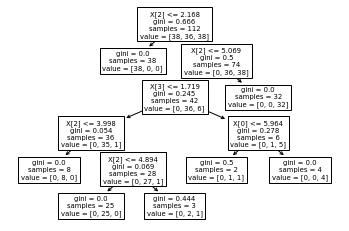

In [82]:
tree.plot_tree(iris_clf_tuned)

**With Parameter tuned Entropy**

In [83]:
iris_en_clf_tuned = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=100,min_samples_split=3,min_samples_leaf=2,random_state=0,max_leaf_nodes=100)

In [84]:
iris_en_clf_tuned.fit(iris_X_train,iris_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [85]:
iris_en_tune_pred = iris_en_clf_tuned.predict(iris_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [86]:
confusion_matrix(iris_y_test,iris_en_tune_pred)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 10]])

In [88]:
print(f"Micro recall score entropy decision tuned {recall_score(iris_y_test,iris_en_tune_pred,average='micro')}")
print(f"Macro recall score entropy decision tuned {recall_score(iris_y_test,iris_en_tune_pred,average='macro')}")
print(f"Weighted recall score entropy decision tuned {recall_score(iris_y_test,iris_en_tune_pred,average='weighted')}")
print(f"None recall score entropy decision tuned {recall_score(iris_y_test,iris_en_tune_pred,average=None)}")

Micro recall score entropy decision tuned 0.9210526315789473
Macro recall score entropy decision tuned 0.9206349206349206
Weighted recall score entropy decision tuned 0.9210526315789473
None recall score entropy decision tuned [1.         0.92857143 0.83333333]


In [89]:
print(f"Micro f1 score entropy decision tuned {f1_score(iris_y_test,iris_en_tune_pred,average='micro')}")
print(f"Macro f1 score entropy decision tuned {f1_score(iris_y_test,iris_en_tune_pred,average='macro')}")
print(f"Weighted f1 score entropy decision tuned {f1_score(iris_y_test,iris_en_tune_pred,average='weighted')}")
print(f"None average entropy decision tuned {f1_score(iris_y_test,iris_en_tune_pred,average=None)}")

Micro f1 score entropy decision tuned 0.9210526315789473
Macro f1 score entropy decision tuned 0.9220389805097451
Weighted f1 score entropy decision tuned 0.9206975459638602
None average entropy decision tuned [1.         0.89655172 0.86956522]


In [90]:
print(f"ACCURACY SCORE ENTROPY TUNED {accuracy_score(iris_y_test,iris_en_tune_pred)}")

ACCURACY SCORE ENTROPY TUNED 0.9210526315789473


In [91]:
print(f"Micro precision score entropy decision tuned {precision_score(iris_y_test,iris_en_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision tuned {precision_score(iris_y_test,iris_en_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision tuned {precision_score(iris_y_test,iris_en_tune_pred,average='weighted')}")
print(f"None precision score entropy decision tuned {precision_score(iris_y_test,iris_en_tune_pred,average=None)}")

Micro precision score entropy decision tuned 0.9210526315789473
Macro precision score entropy decision tuned 0.9252525252525253
Weighted precision score entropy decision tuned 0.9221690590111642
None precision score entropy decision tuned [1.         0.86666667 0.90909091]


[Text(167.4, 199.32, 'X[2] <= 2.168\nentropy = 1.584\nsamples = 112\nvalue = [38, 36, 38]'),
 Text(125.55000000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(209.25, 163.07999999999998, 'X[2] <= 5.069\nentropy = 0.999\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(167.4, 126.83999999999999, 'X[3] <= 1.719\nentropy = 0.592\nsamples = 42\nvalue = [0, 36, 6]'),
 Text(83.7, 90.6, 'X[2] <= 3.998\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(41.85, 54.359999999999985, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(125.55000000000001, 54.359999999999985, 'X[2] <= 4.894\nentropy = 0.222\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(83.7, 18.119999999999976, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(167.4, 18.119999999999976, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(251.10000000000002, 90.6, 'X[0] <= 5.964\nentropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(209.25, 54.359999999999985, 'entropy = 1.0\ns

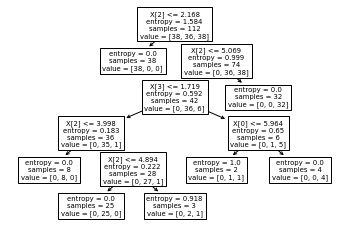

In [92]:
tree.plot_tree(iris_en_clf_tuned)

#Breast Cancer Dataset

In [116]:
breast_cancer_data = breast_cancer[["clump_thickness","cell_size","cell_shape","marginal_adhesion","single_epithelial_cell_size","bland_chromatin","normal_nucleoli","mitoses"]].values

In [117]:
breast_cancer_data_values = breast_cancer["class"].values

In [118]:
breast_cancer_data

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [105]:
breast_cancer_categories = ["benign","malignant"]

In [119]:
breast_cancer_X_train,breast_cancer_X_test,breast_cancer_y_train,breast_cancer_y_test = train_test_split(breast_cancer_data,breast_cancer_data_values,test_size=0.25)

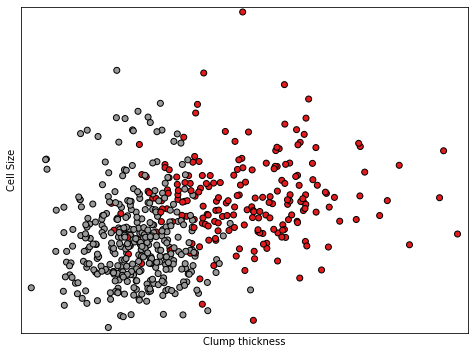

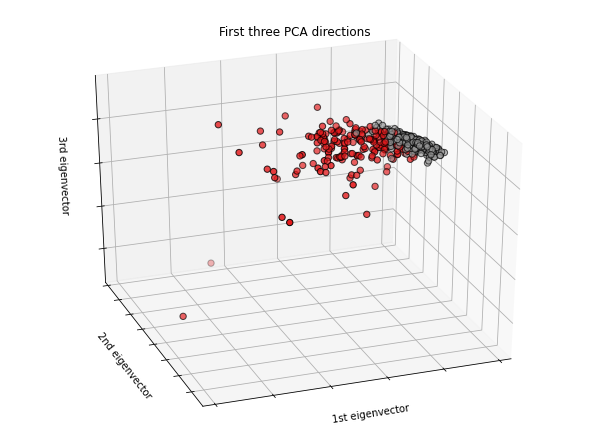

In [120]:
breast_cancer_graph_x = load_breast_cancer().data[:,:2]
breast_cancer_graph_y = load_breast_cancer().target
breast_cancer_x_min, breast_cancer_x_max = breast_cancer_graph_x[:, 0].min() - .5, breast_cancer_graph_x[:, 0].max() + .5
breast_cancer_y_min, breast_cancer_y_max = breast_cancer_graph_x[:, 1].min() - .5, breast_cancer_graph_x[:, 1].max() + .5
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(breast_cancer_graph_x[:, 0], breast_cancer_graph_x[:, 1], c=breast_cancer_graph_y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Clump thickness')
plt.ylabel('Cell Size')

plt.xlim(breast_cancer_x_min, breast_cancer_x_max)
plt.ylim(breast_cancer_y_min, breast_cancer_y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
breast_cancer_X_reduced = PCA(n_components=3).fit_transform(load_breast_cancer().data)
ax.scatter(breast_cancer_X_reduced[:, 0], breast_cancer_X_reduced[:, 1], breast_cancer_X_reduced[:, 2], c=breast_cancer_graph_y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

#Naive Bayes Breast Cancer Dataset 

**Without Parameter Tuning Naive Bayes Classification(Gaussian,Multinomial,Bernoulli)**

In [121]:
breast_cancer_gnb = GaussianNB()
breast_cancer_gnb.fit(breast_cancer_X_train,breast_cancer_y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [122]:
breast_cancer_multi = MultinomialNB()
breast_cancer_multi.fit(breast_cancer_X_train,breast_cancer_y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
breast_cancer_bern = BernoulliNB()
breast_cancer_bern.fit(breast_cancer_X_train,breast_cancer_y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [125]:
breast_cancer_gnb_pred = breast_cancer_gnb.predict(breast_cancer_X_test)
breast_cancer_multinb_pred = breast_cancer_multi.predict(breast_cancer_X_test)
breast_cancer_bernnb_pred = breast_cancer_bern.predict(breast_cancer_X_test)

Confusion Matrices

In [126]:
confusion_matrix(breast_cancer_y_test,breast_cancer_gnb_pred)

array([[110,   9],
       [  1,  55]])

In [127]:
confusion_matrix(breast_cancer_y_test,breast_cancer_multinb_pred)

array([[112,   7],
       [ 20,  36]])

In [128]:
confusion_matrix(breast_cancer_y_test,breast_cancer_bernnb_pred)

array([[119,   0],
       [ 56,   0]])

Metrics: Recall Score,F1 score,accuracy and precision score

In [129]:
print(f"Micro recall score gaussian naive bayes {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='micro')}")
print(f"Macro recall score gaussian naive bayes {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='macro')}")
print(f"Weighted recall score gaussian naive bayes {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='weighted')}")
print(f"None recall score average {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred,average=None)}")
print(f"Micro recall score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='micro')}")
print(f"Macro recall score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='macro')}")
print(f"Weighted recall score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='weighted')}")
print(f"None recall score average {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average=None)}")
print(f"Micro recall score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='micro')}")
print(f"Macro recall score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='macro')}")
print(f"Weighted recall score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='weighted')}")
print(f"None recall score average {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average=None)}")

Micro recall score gaussian naive bayes 0.9428571428571428
Macro recall score gaussian naive bayes 0.9532563025210083
Weighted recall score gaussian naive bayes 0.9428571428571428
None recall score average [0.92436975 0.98214286]
Micro recall score multinomial naive bayes 0.8457142857142858
Macro recall score multinomial naive bayes 0.7920168067226891
Weighted recall score multinomial naive bayes 0.8457142857142858
None recall score average [0.94117647 0.64285714]
Micro recall score bernoulli naive bayes 0.68
Macro recall score bernoulli naive bayes 0.5
Weighted recall score bernoulli naive bayes 0.68
None recall score average [1. 0.]


In [130]:
print(f"Micro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='weighted')}")
print(f"None precision score average {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average=None)}")
print(f"Micro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='micro')}")
print(f"Macro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='weighted')}")
print(f"None precision score average multinomial {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average=None)}")
print(f"Micro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='weighted')}")
print(f"None precision score average bernoulli {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average=None)}")

Micro precision score gaussian naive bayes 0.9428571428571428
Macro precision score gaussian naive bayes 0.9251829954954955
Weighted precision score gaussian naive bayes 0.9488738738738739
None precision score average [0.99099099 0.859375  ]
Micro precision score multinomial naive bayes 0.8457142857142858
Macro precision score multinomial naive bayes 0.7920168067226891
Weighted precision score multinomial naive bayes 0.8457142857142858
None precision score average multinomial [0.94117647 0.64285714]
Micro precision score bernoulli naive bayes 0.68
Macro precision score bernoulli naive bayes 0.5
Weighted precision score bernoulli naive bayes 0.68
None precision score average bernoulli [1. 0.]


In [131]:
print(f"ACCURACY SCORE GAUSSIAN {accuracy_score(breast_cancer_y_test,breast_cancer_gnb_pred)}")
print(f"ACCURACY SCORE MULTINOMIAL {accuracy_score(breast_cancer_y_test,breast_cancer_multinb_pred)}")
print(f"ACCURACY SCORE BERNOULLI {accuracy_score(breast_cancer_y_test,breast_cancer_bernnb_pred)}")

ACCURACY SCORE GAUSSIAN 0.9428571428571428
ACCURACY SCORE MULTINOMIAL 0.8457142857142858
ACCURACY SCORE BERNOULLI 0.68


In [132]:
print(f"Micro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average='weighted')}")
print(f"None precision score average {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred,average=None)}")
print(f"Micro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='micro')}")
print(f"Macro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average='weighted')}")
print(f"None precision score average multinomial {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred,average=None)}")
print(f"Micro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average='weighted')}")
print(f"None precision score average bernoulli {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred,average=None)}")

Micro precision score gaussian naive bayes 0.9428571428571428
Macro precision score gaussian naive bayes 0.9251829954954955
Weighted precision score gaussian naive bayes 0.9488738738738739
None precision score average [0.99099099 0.859375  ]
Micro precision score multinomial naive bayes 0.8457142857142858
Macro precision score multinomial naive bayes 0.7920168067226891
Weighted precision score multinomial naive bayes 0.8457142857142858
None precision score average multinomial [0.94117647 0.64285714]
Micro precision score bernoulli naive bayes 0.68
Macro precision score bernoulli naive bayes 0.5
Weighted precision score bernoulli naive bayes 0.68
None precision score average bernoulli [1. 0.]


**With Parameter Tuning**

In [133]:
breast_cancer["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

In [134]:
priors_breast_cancer_NB = np.array([0.65522174535,0.34477825464])

In [136]:
breast_cancer_gnb_tuned = GaussianNB(priors=priors_breast_cancer_NB,var_smoothing=1e-05)
breast_cancer_gnb_tuned.fit(breast_cancer_X_train,breast_cancer_y_train)
breast_cancer_multi_tuned = MultinomialNB(class_prior=priors_breast_cancer_NB,fit_prior=False,alpha=0.8)
breast_cancer_multi_tuned.fit(breast_cancer_X_train,breast_cancer_y_train)
breast_cancer_bern_tuned = BernoulliNB(class_prior=priors_breast_cancer_NB,fit_prior=False,alpha=0.8,binarize=0.33)
breast_cancer_bern_tuned.fit(breast_cancer_X_train,breast_cancer_y_train)

GaussianNB(priors=array([0.65522175, 0.34477825]), var_smoothing=1e-05)

In [137]:
breast_cancer_multi_tuned = MultinomialNB(class_prior=priors_breast_cancer_NB,fit_prior=False,alpha=0.8)
breast_cancer_multi_tuned.fit(breast_cancer_X_train,breast_cancer_y_train)

MultinomialNB(alpha=0.8, class_prior=array([0.65522175, 0.34477825]),
              fit_prior=False)

In [138]:
breast_cancer_bern_tuned = BernoulliNB(class_prior=priors_breast_cancer_NB,fit_prior=False,alpha=0.8,binarize=0.33)
breast_cancer_bern_tuned.fit(breast_cancer_X_train,breast_cancer_y_train)

BernoulliNB(alpha=0.8, binarize=0.33,
            class_prior=array([0.65522175, 0.34477825]), fit_prior=False)

In [139]:
breast_cancer_gnb_pred_tune = breast_cancer_gnb.predict(breast_cancer_X_test)
breast_cancer_multinb_pred_tune = breast_cancer_multi.predict(breast_cancer_X_test)
breast_cancer_bernnb_pred_tune = breast_cancer_bern.predict(breast_cancer_X_test)

Confusion Matrices

In [140]:
confusion_matrix(breast_cancer_y_test,breast_cancer_gnb_pred_tune)

array([[110,   9],
       [  1,  55]])

In [141]:
confusion_matrix(breast_cancer_y_test,breast_cancer_multinb_pred_tune)

array([[112,   7],
       [ 20,  36]])

In [142]:
confusion_matrix(breast_cancer_y_test,breast_cancer_bernnb_pred_tune)

array([[119,   0],
       [ 56,   0]])

Metrics: Recall Score,F1 score,accuracy and precision score

In [143]:
print(f"Micro recall score gaussian naive bayes {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='micro')}")
print(f"Macro recall score gaussian naive bayes {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='macro')}")
print(f"Weighted recall score gaussian naive bayes {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average=None)}")
print(f"Micro recall score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='micro')}")
print(f"Macro recall score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='macro')}")
print(f"Weighted recall score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average=None)}")
print(f"Micro recall score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='micro')}")
print(f"Macro recall score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='macro')}")
print(f"Weighted recall score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average=None)}")

Micro recall score gaussian naive bayes 0.9428571428571428
Macro recall score gaussian naive bayes 0.9532563025210083
Weighted recall score gaussian naive bayes 0.9428571428571428
None recall score average [0.92436975 0.98214286]
Micro recall score multinomial naive bayes 0.8457142857142858
Macro recall score multinomial naive bayes 0.7920168067226891
Weighted recall score multinomial naive bayes 0.8457142857142858
None recall score average [0.94117647 0.64285714]
Micro recall score bernoulli naive bayes 0.68
Macro recall score bernoulli naive bayes 0.5
Weighted recall score bernoulli naive bayes 0.68
None recall score average [1. 0.]


In [144]:
print(f"Micro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='weighted')}")
print(f"None precision score average {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average=None)}")
print(f"Micro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='micro')}")
print(f"Macro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='weighted')}")
print(f"None precision score average multinomial {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average=None)}")
print(f"Micro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='weighted')}")
print(f"None precision score average bernoulli {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average=None)}")

Micro precision score gaussian naive bayes 0.9428571428571428
Macro precision score gaussian naive bayes 0.9251829954954955
Weighted precision score gaussian naive bayes 0.9488738738738739
None precision score average [0.99099099 0.859375  ]
Micro precision score multinomial naive bayes 0.8457142857142858
Macro precision score multinomial naive bayes 0.7920168067226891
Weighted precision score multinomial naive bayes 0.8457142857142858
None precision score average multinomial [0.94117647 0.64285714]
Micro precision score bernoulli naive bayes 0.68
Macro precision score bernoulli naive bayes 0.5
Weighted precision score bernoulli naive bayes 0.68
None precision score average bernoulli [1. 0.]


In [145]:
print(f"ACCURACY SCORE GAUSSIAN {accuracy_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune)}")
print(f"ACCURACY SCORE MULTINOMIAL {accuracy_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune)}")
print(f"ACCURACY SCORE BERNOULLI {accuracy_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune)}")

ACCURACY SCORE GAUSSIAN 0.9428571428571428
ACCURACY SCORE MULTINOMIAL 0.8457142857142858
ACCURACY SCORE BERNOULLI 0.68


In [146]:
print(f"Micro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average='weighted')}")
print(f"None precision score average {precision_score(breast_cancer_y_test,breast_cancer_gnb_pred_tune,average=None)}")
print(f"Micro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='micro')}")
print(f"Macro precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average='weighted')}")
print(f"None precision score average multinomial {recall_score(breast_cancer_y_test,breast_cancer_multinb_pred_tune,average=None)}")
print(f"Micro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average='weighted')}")
print(f"None precision score average bernoulli {recall_score(breast_cancer_y_test,breast_cancer_bernnb_pred_tune,average=None)}")

Micro precision score gaussian naive bayes 0.9428571428571428
Macro precision score gaussian naive bayes 0.9251829954954955
Weighted precision score gaussian naive bayes 0.9488738738738739
None precision score average [0.99099099 0.859375  ]
Micro precision score multinomial naive bayes 0.8457142857142858
Macro precision score multinomial naive bayes 0.7920168067226891
Weighted precision score multinomial naive bayes 0.8457142857142858
None precision score average multinomial [0.94117647 0.64285714]
Micro precision score bernoulli naive bayes 0.68
Macro precision score bernoulli naive bayes 0.5
Weighted precision score bernoulli naive bayes 0.68
None precision score average bernoulli [1. 0.]


#Decision Classifier Breast Cancer

**Without parameter tuning gini**

In [147]:
breast_cancer_clf_non_tune = DecisionTreeClassifier(random_state=0)
breast_cancer_clf_non_tune.fit(breast_cancer_X_train,breast_cancer_y_train)
breast_cancer_non_tune_pred = breast_cancer_clf_non_tune.predict(breast_cancer_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [149]:
confusion_matrix(breast_cancer_y_test,breast_cancer_non_tune_pred)

array([[112,   7],
       [  5,  51]])

In [172]:
print(f"Micro recall score gini decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='micro')}")
print(f"Macro recall score gini decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='macro')}")
print(f"Weighted recall score gini decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='weighted')}")
print(f"None recall score gini decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average=None)}")

Micro recall score gini decision non tuned 0.9314285714285714
Macro recall score gini decision non tuned 0.9259453781512605
Weighted recall score gini decision non tuned 0.9314285714285714
None recall score gini decision non tuned [0.94117647 0.91071429]


In [173]:
print(f"Micro f1 score gini decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='micro')}")
print(f"Macro f1 score gini decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='macro')}")
print(f"Weighted f1 score gini decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='weighted')}")
print(f"None average gini decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average=None)}")

Micro f1 score gini decision non tuned 0.9314285714285714
Macro f1 score gini decision non tuned 0.9219446922390723
Weighted f1 score gini decision non tuned 0.9317395182872434
None average gini decision non tuned [0.94915254 0.89473684]


In [174]:
print(f"ACCURACY SCORE GINI NON TUNED {accuracy_score(breast_cancer_y_test,breast_cancer_non_tune_pred)}")

ACCURACY SCORE GINI NON TUNED 0.9314285714285714


In [175]:
print(f"Micro precision score gini decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='micro')}")
print(f"Macro precision score gini decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average='weighted')}")
print(f"None precision score gini decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_non_tune_pred,average=None)}")

Micro precision score gini decision non tuned 0.9314285714285714
Macro precision score gini decision non tuned 0.9182876510462717
Weighted precision score gini decision non tuned 0.9323194812849985
None precision score gini decision non tuned [0.95726496 0.87931034]


[Text(757.3829268292683, 1437.52, 'X[2] <= 3.5\ngini = 0.457\nsamples = 524\nvalue = [339, 185]'),
 Text(466.81463414634146, 1268.3999999999999, 'X[5] <= 3.5\ngini = 0.123\nsamples = 348\nvalue = [325, 23]'),
 Text(323.91219512195124, 1099.28, 'X[0] <= 7.5\ngini = 0.037\nsamples = 321\nvalue = [315, 6]'),
 Text(285.8048780487805, 930.1599999999999, 'X[6] <= 3.5\ngini = 0.025\nsamples = 319\nvalue = [315, 4]'),
 Text(152.42926829268293, 761.04, 'X[4] <= 5.5\ngini = 0.013\nsamples = 314\nvalue = [312, 2]'),
 Text(76.21463414634147, 591.9199999999998, 'X[7] <= 2.5\ngini = 0.006\nsamples = 312\nvalue = [311, 1]'),
 Text(38.107317073170734, 422.79999999999995, 'gini = 0.0\nsamples = 309\nvalue = [309, 0]'),
 Text(114.3219512195122, 422.79999999999995, 'X[6] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(76.21463414634147, 253.67999999999984, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(152.42926829268293, 253.67999999999984, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text

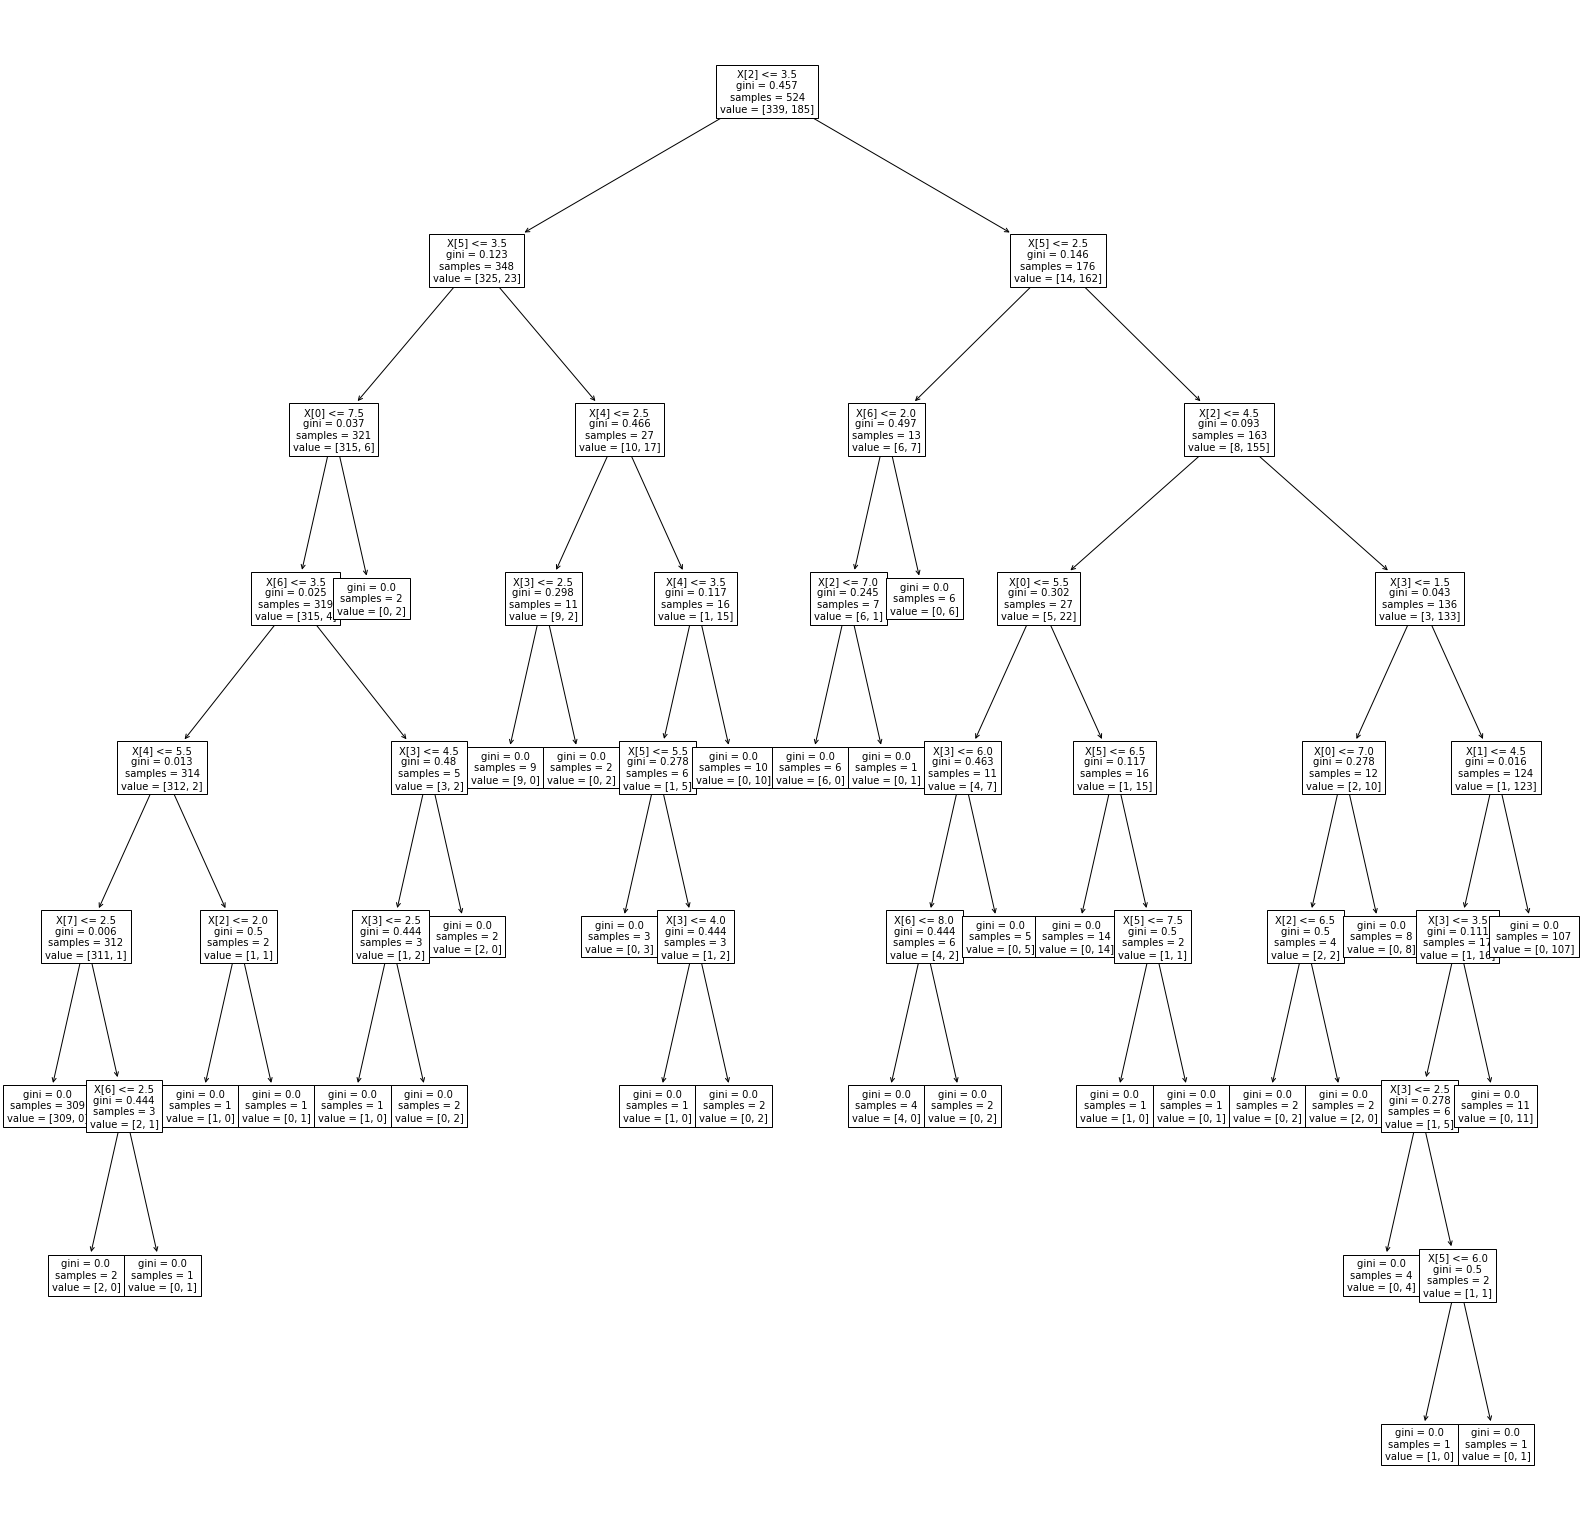

In [176]:
plt.figure(figsize=(28,28))
tree.plot_tree(breast_cancer_clf_non_tune,fontsize=10)

**Without parameter tuning entropy**

In [158]:
breast_cancer_en_clf_non_tune = DecisionTreeClassifier(random_state=0,criterion="entropy")
breast_cancer_en_clf_non_tune.fit(breast_cancer_X_train,breast_cancer_y_train)
breast_cancer_en_non_tune_pred = breast_cancer_clf_non_tune.predict(breast_cancer_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [159]:
confusion_matrix(breast_cancer_y_test,breast_cancer_en_non_tune_pred)

array([[112,   7],
       [  5,  51]])

In [171]:
print(f"Micro recall score entropy decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='micro')}")
print(f"Macro recall score entropy decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='macro')}")
print(f"Weighted recall score entropy decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='weighted')}")
print(f"None recall score entropy decision non tuned {recall_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average=None)}")

Micro recall score entropy decision non tuned 0.9314285714285714
Macro recall score entropy decision non tuned 0.9259453781512605
Weighted recall score entropy decision non tuned 0.9314285714285714
None recall score entropy decision non tuned [0.94117647 0.91071429]


In [170]:
print(f"Micro f1 score entropy decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='micro')}")
print(f"Macro f1 score entropy decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='macro')}")
print(f"Weighted f1 score entropy decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='weighted')}")
print(f"None average entropy decision non tuned {f1_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average=None)}")

Micro f1 score entropy decision non tuned 0.9314285714285714
Macro f1 score entropy decision non tuned 0.9219446922390723
Weighted f1 score entropy decision non tuned 0.9317395182872434
None average entropy decision non tuned [0.94915254 0.89473684]


In [169]:
print(f"ACCURACY SCORE ENTROPY NON TUNED {accuracy_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred)}")

ACCURACY SCORE ENTROPY NON TUNED 0.9314285714285714


In [168]:
print(f"Micro precision score entropy decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average='weighted')}")
print(f"None precision score entropy decision non tuned {precision_score(breast_cancer_y_test,breast_cancer_en_non_tune_pred,average=None)}")

Micro precision score entropy decision non tuned 0.9314285714285714
Macro precision score entropy decision non tuned 0.9182876510462717
Weighted precision score entropy decision non tuned 0.9323194812849985
None precision score entropy decision non tuned [0.95726496 0.87931034]


[Text(788.7115384615386, 1463.5384615384614, 'X[1] <= 2.5\nentropy = 0.937\nsamples = 524\nvalue = [339, 185]'),
 Text(390.6, 1346.4553846153844, 'X[6] <= 3.5\nentropy = 0.186\nsamples = 317\nvalue = [308, 9]'),
 Text(240.3692307692308, 1229.3723076923077, 'X[0] <= 6.5\nentropy = 0.079\nsamples = 310\nvalue = [307, 3]'),
 Text(120.1846153846154, 1112.2892307692307, 'X[4] <= 5.5\nentropy = 0.032\nsamples = 307\nvalue = [306, 1]'),
 Text(60.0923076923077, 995.2061538461538, 'entropy = 0.0\nsamples = 305\nvalue = [305, 0]'),
 Text(180.27692307692308, 995.2061538461538, 'X[0] <= 3.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(120.1846153846154, 878.1230769230768, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(240.3692307692308, 878.1230769230768, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(360.55384615384617, 1112.2892307692307, 'X[1] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(300.4615384615385, 995.2061538461538, 'entropy = 0.0\nsamples = 1\nvalu

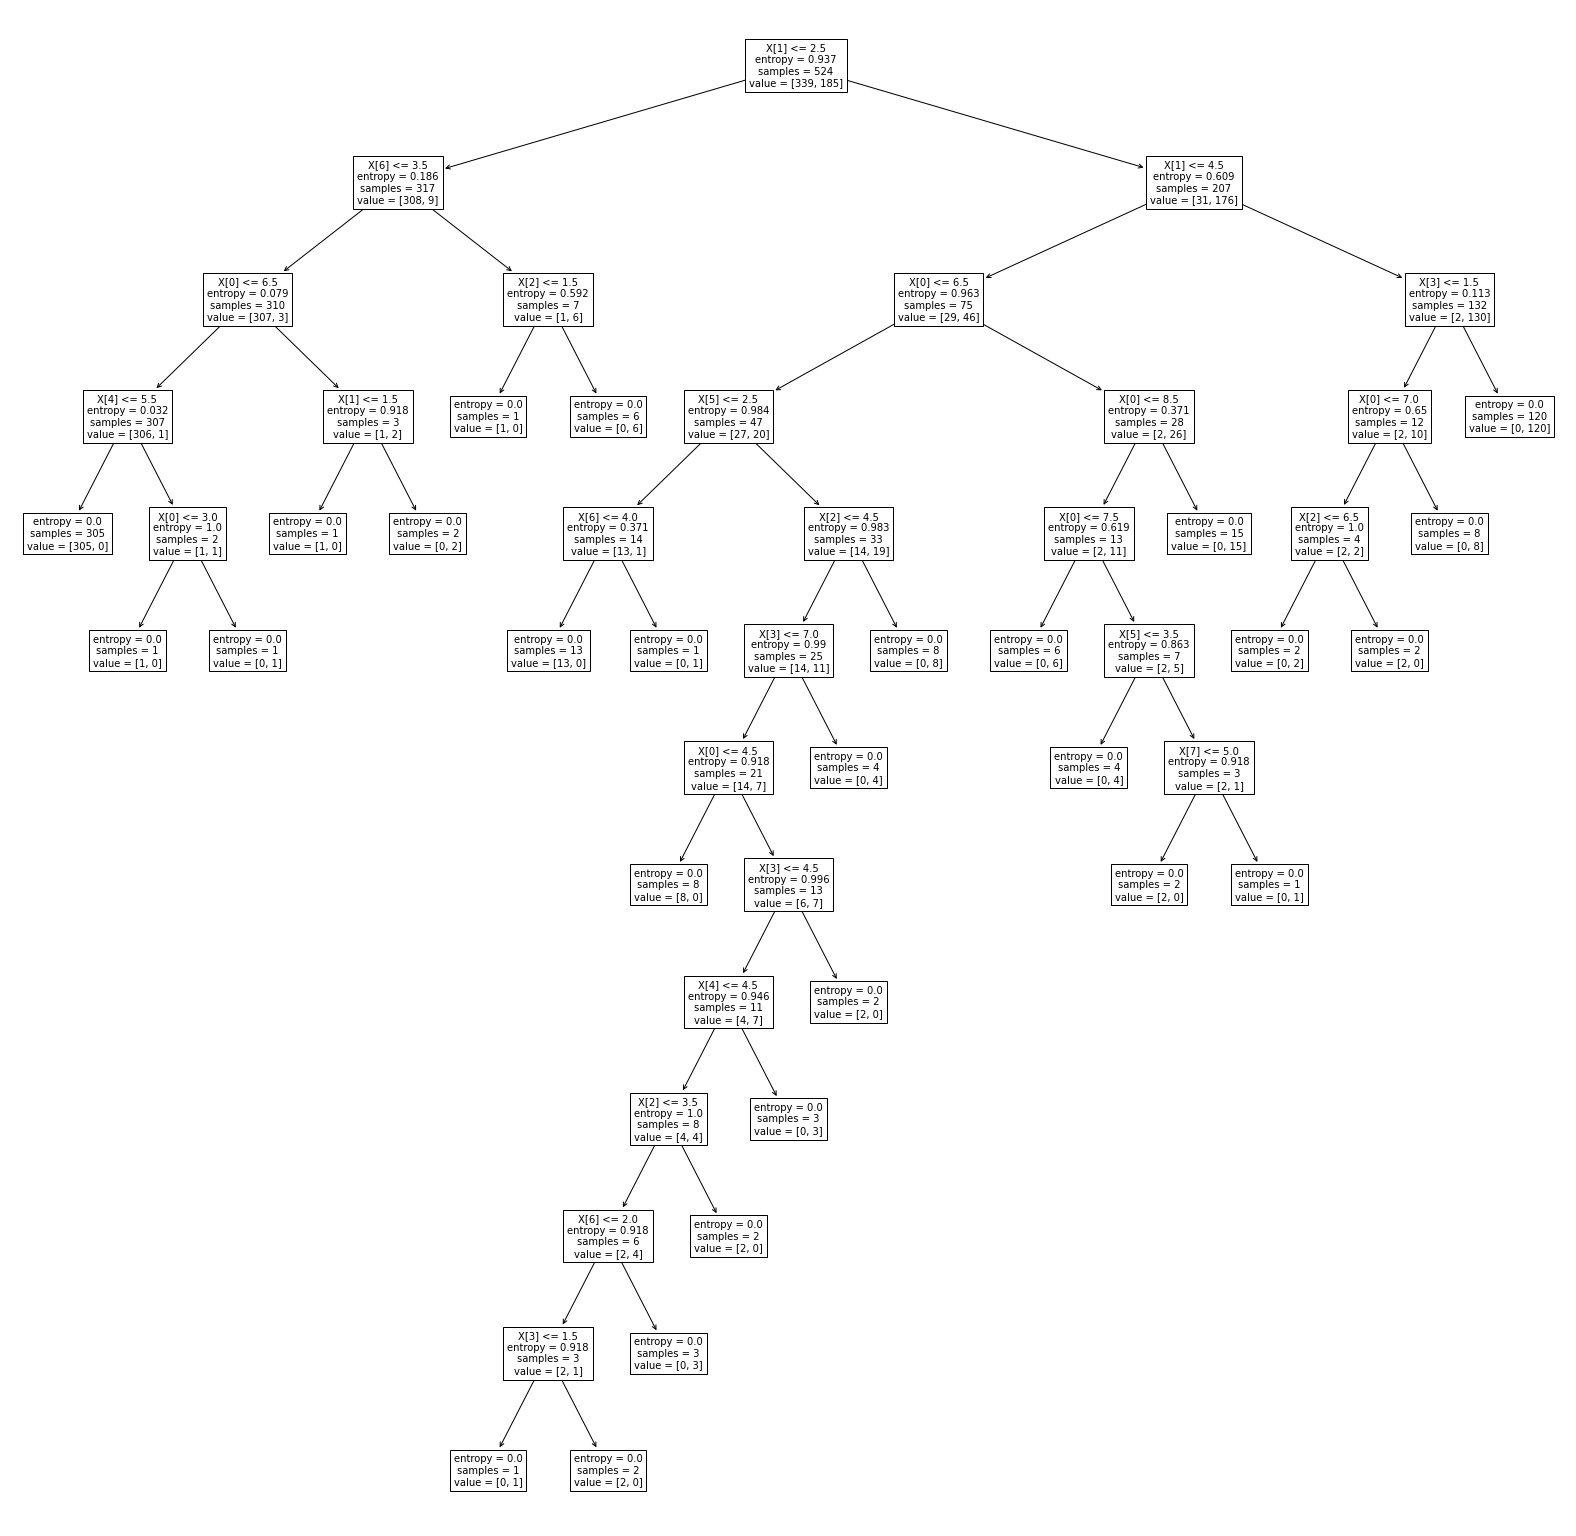

In [164]:
plt.figure(figsize=(28,28))
tree.plot_tree(breast_cancer_en_clf_non_tune,fontsize=10)

**With Parameter Tuning gini**

In [166]:
breast_cancer_clf_tuned = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=100,min_samples_split=3,min_samples_leaf=2,random_state=0,max_leaf_nodes=100)
breast_cancer_clf_tuned.fit(breast_cancer_X_train,breast_cancer_y_train)
breast_cancer_tune_pred = breast_cancer_clf_tuned.predict(breast_cancer_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [167]:
confusion_matrix(breast_cancer_y_test,breast_cancer_tune_pred)

array([[114,   5],
       [  4,  52]])

In [184]:
print(f"Micro recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_tune_pred,average='micro')}")
print(f"Macro recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_tune_pred,average='macro')}")
print(f"Weighted recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_tune_pred,average='weighted')}")
print(f"None recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_tune_pred,average=None)}")

Micro recall score gini decision tuned 0.9485714285714286
Macro recall score gini decision tuned 0.9432773109243697
Weighted recall score gini decision tuned 0.9485714285714286
None recall score gini decision tuned [0.95798319 0.92857143]


In [185]:
print(f"Micro f1 score gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_tune_pred,average='micro')}")
print(f"Macro f1 score gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_tune_pred,average='macro')}")
print(f"Weighted f1 score gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_tune_pred,average='weighted')}")
print(f"None average gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_tune_pred,average=None)}")

Micro f1 score gini decision tuned 0.9485714285714286
Macro f1 score gini decision tuned 0.9411896493782905
Weighted f1 score gini decision tuned 0.9486904895261566
None average gini decision tuned [0.96202532 0.92035398]


In [186]:
print(f"ACCURACY SCORE GINI TUNED {accuracy_score(breast_cancer_y_test,breast_cancer_tune_pred)}")

ACCURACY SCORE GINI TUNED 0.9485714285714286


In [187]:
print(f"Micro precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_tune_pred,average='micro')}")
print(f"Macro precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_tune_pred,average='weighted')}")
print(f"None precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_tune_pred,average=None)}")

Micro precision score gini decision tuned 0.9485714285714286
Macro precision score gini decision tuned 0.93919119833482
Weighted precision score gini decision tuned 0.9488789771037763
None precision score gini decision tuned [0.96610169 0.9122807 ]


[Text(426.109090909091, 1452.8945454545453, 'X[2] <= 2.845\ngini = 0.457\nsamples = 524\nvalue = [339, 185]'),
 Text(142.03636363636366, 1314.5236363636363, 'X[2] <= 1.41\ngini = 0.039\nsamples = 305\nvalue = [299, 6]'),
 Text(94.6909090909091, 1176.1527272727271, 'gini = 0.0\nsamples = 263\nvalue = [263, 0]'),
 Text(189.3818181818182, 1176.1527272727271, 'X[4] <= 2.648\ngini = 0.245\nsamples = 42\nvalue = [36, 6]'),
 Text(94.6909090909091, 1037.7818181818182, 'X[7] <= 1.065\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(47.34545454545455, 899.410909090909, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(142.03636363636366, 899.410909090909, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(284.0727272727273, 1037.7818181818182, 'X[0] <= 8.784\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(236.72727272727275, 899.410909090909, 'X[4] <= 4.245\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(189.3818181818182, 761.04, 'X[5] <= 1.5\ngini = 0.198\nsamples = 9\nvalue 

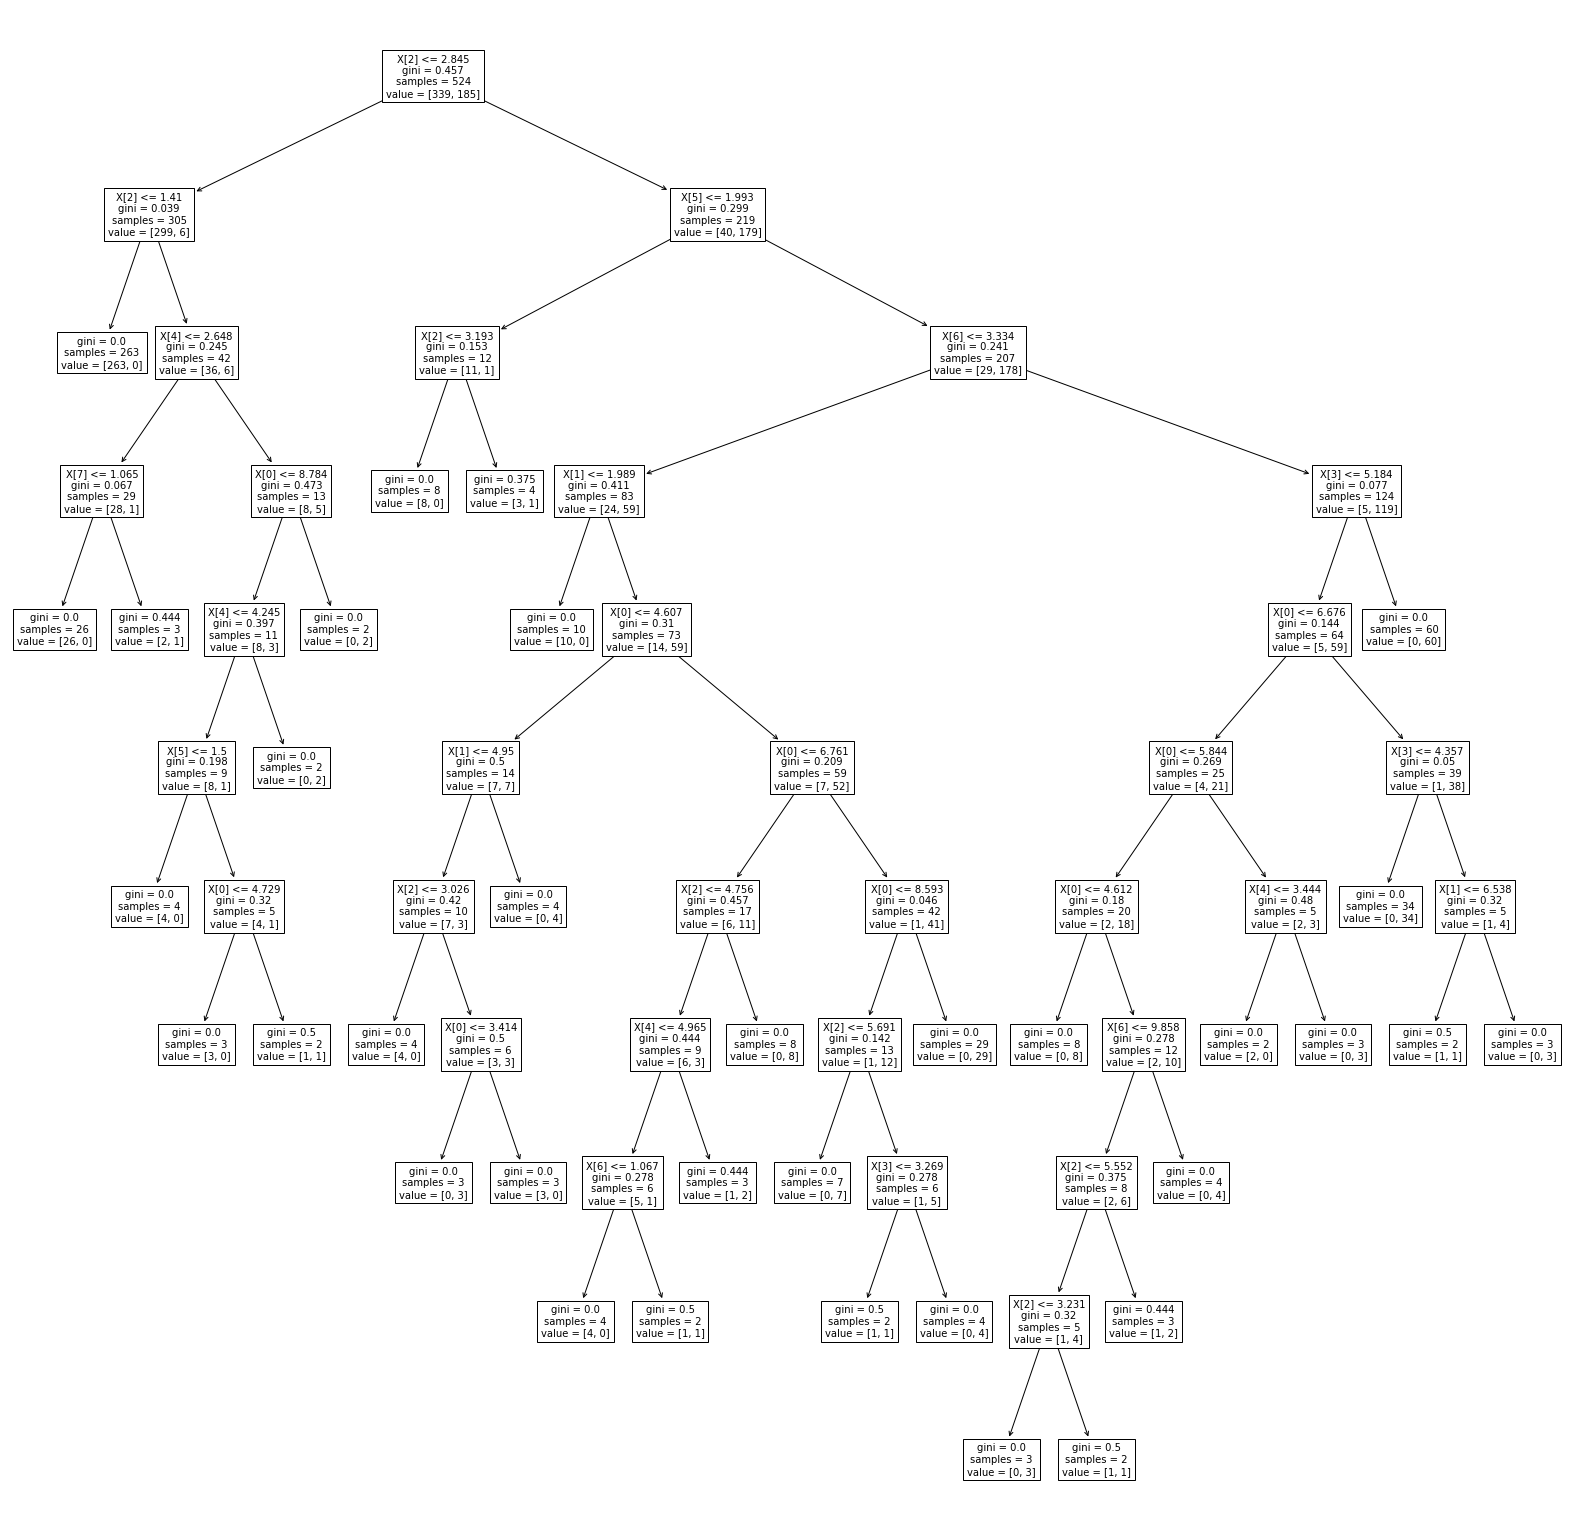

In [182]:
plt.figure(figsize=(28,28))
tree.plot_tree(breast_cancer_clf_tuned,fontsize=10)

**With Parameter tuning entropy**

In [183]:
breast_cancer_en_clf_tuned = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=100,min_samples_split=3,min_samples_leaf=2,random_state=0,max_leaf_nodes=100)
breast_cancer_en_clf_tuned.fit(breast_cancer_X_train,breast_cancer_y_train)
breast_cancer_en_tune_pred = breast_cancer_en_clf_tuned.predict(breast_cancer_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [188]:
print(f"Micro recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='micro')}")
print(f"Macro recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='macro')}")
print(f"Weighted recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='weighted')}")
print(f"None recall score gini decision tuned {recall_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average=None)}")

Micro recall score gini decision tuned 0.9314285714285714
Macro recall score gini decision tuned 0.921218487394958
Weighted recall score gini decision tuned 0.9314285714285714
None recall score gini decision tuned [0.94957983 0.89285714]


In [189]:
print(f"Micro f1 score gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='micro')}")
print(f"Macro f1 score gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='macro')}")
print(f"Weighted f1 score gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='weighted')}")
print(f"None average gini decision tuned {f1_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average=None)}")

Micro f1 score gini decision tuned 0.9314285714285714
Macro f1 score gini decision tuned 0.921218487394958
Weighted f1 score gini decision tuned 0.9314285714285714
None average gini decision tuned [0.94957983 0.89285714]


In [190]:
print(f"ACCURACY SCORE GINI TUNED {accuracy_score(breast_cancer_y_test,breast_cancer_en_tune_pred)}")

ACCURACY SCORE GINI TUNED 0.9314285714285714


In [191]:
print(f"Micro precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='micro')}")
print(f"Macro precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average='weighted')}")
print(f"None precision score gini decision tuned {precision_score(breast_cancer_y_test,breast_cancer_en_tune_pred,average=None)}")

Micro precision score gini decision tuned 0.9314285714285714
Macro precision score gini decision tuned 0.921218487394958
Weighted precision score gini decision tuned 0.9314285714285714
None precision score gini decision tuned [0.94957983 0.89285714]


[Text(553.35, 1437.52, 'X[2] <= 2.845\nentropy = 0.937\nsamples = 524\nvalue = [339, 185]'),
 Text(130.20000000000002, 1268.3999999999999, 'X[2] <= 1.41\nentropy = 0.14\nsamples = 305\nvalue = [299, 6]'),
 Text(86.80000000000001, 1099.28, 'entropy = 0.0\nsamples = 263\nvalue = [263, 0]'),
 Text(173.60000000000002, 1099.28, 'X[0] <= 5.142\nentropy = 0.592\nsamples = 42\nvalue = [36, 6]'),
 Text(86.80000000000001, 930.1599999999999, 'X[3] <= 4.845\nentropy = 0.183\nsamples = 36\nvalue = [35, 1]'),
 Text(43.400000000000006, 761.04, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(130.20000000000002, 761.04, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(260.40000000000003, 930.1599999999999, 'X[3] <= 1.419\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(217.00000000000003, 761.04, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(303.80000000000007, 761.04, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(976.5000000000001, 1268.3999999999999, 'X[6] <= 3.157\n

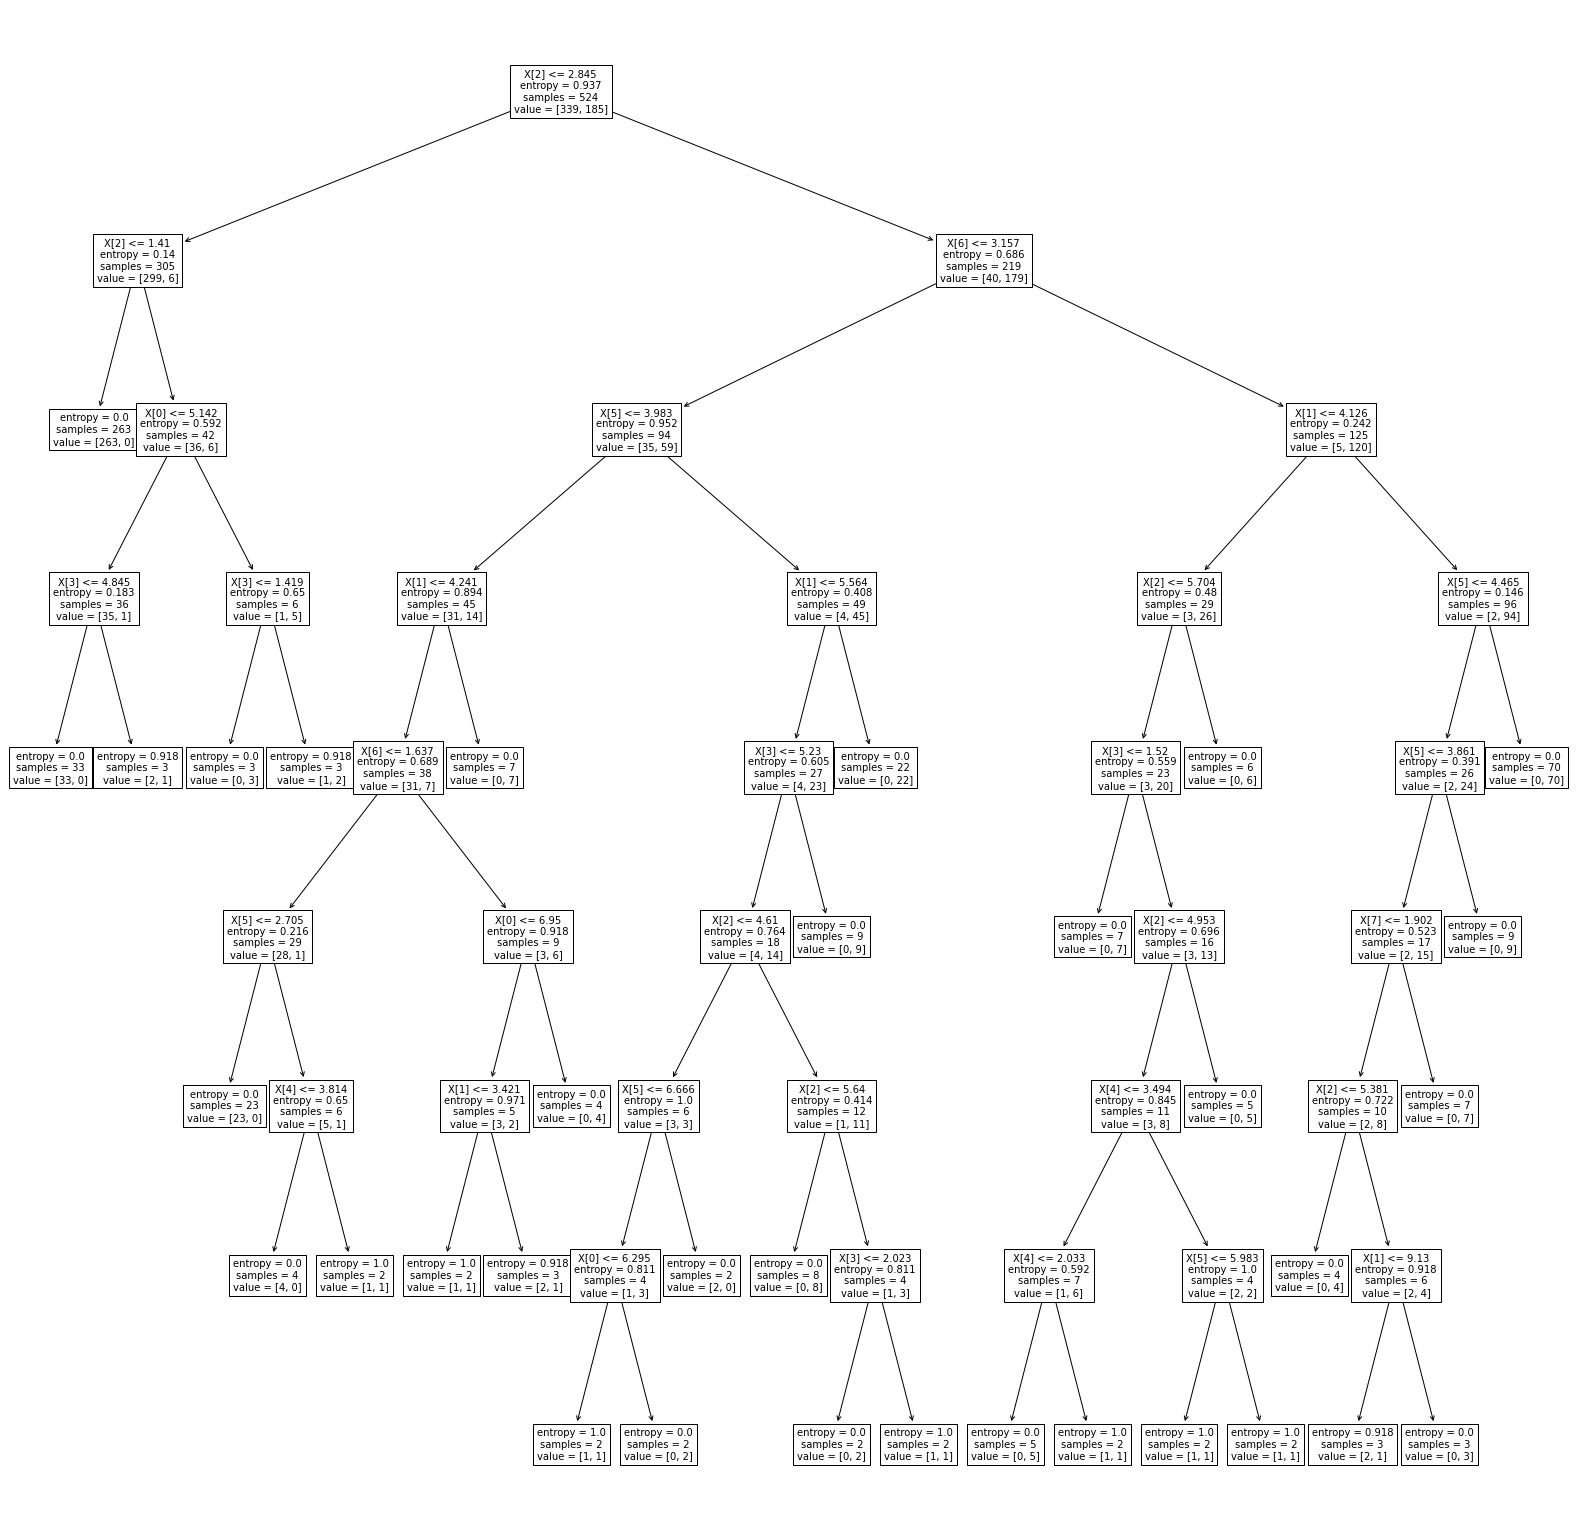

In [192]:
plt.figure(figsize=(28,28))
tree.plot_tree(breast_cancer_en_clf_tuned,fontsize=10)

#Diabetes dataset

In [193]:
#AGE	SEX	BMI	BP	S1	S2	S3	S4	S5	S6	Y
diabetes_data = diabetes[["BMI","BP","S1","S2","S3","S4","S5","S6","Y"]].values

In [195]:
diabetes_data_values = diabetes["SEX"].values

In [196]:
diabetes_data

array([[ 32.1   , 101.    , 157.    , ...,   4.8598,  87.    , 151.    ],
       [ 21.6   ,  87.    , 183.    , ...,   3.8918,  69.    ,  75.    ],
       [ 30.5   ,  93.    , 156.    , ...,   4.6728,  85.    , 141.    ],
       ...,
       [ 24.9   ,  99.67  , 162.    , ...,   4.1271,  95.    , 132.    ],
       [ 30.    ,  95.    , 201.    , ...,   5.1299,  85.    , 220.    ],
       [ 19.6   ,  71.    , 250.    , ...,   4.5951,  92.    ,  57.    ]])

In [197]:
diabetes_data_values

array([2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1,

In [198]:
diabetes_categories = ["Male","Female"]

In [200]:
diabetes_X_train,diabetes_X_test,diabetes_y_train,diabetes_y_test = train_test_split(diabetes_data,diabetes_data_values,test_size=0.25)

#Naive Bayes diabetes

**Without Parameter Tuning Naive Bayes Classification(Gaussian,Multinomial,Bernoulli)**

In [201]:
diabetes_gnb = GaussianNB()
diabetes_gnb.fit(diabetes_X_train,diabetes_y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [202]:
diabetes_multi = MultinomialNB()
diabetes_multi.fit(diabetes_X_train,diabetes_y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [205]:
diabetes_bern = BernoulliNB()
diabetes_bern.fit(diabetes_X_train,diabetes_y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [206]:
diabetes_gnb_pred_tune = diabetes_gnb.predict(diabetes_X_test)
diabetes_multinb_pred_tune = diabetes_multi.predict(diabetes_X_test)
diabetes_bernnb_pred_tune = diabetes_bern.predict(diabetes_X_test)

Confusion Matrices

In [207]:
confusion_matrix(diabetes_y_test,diabetes_gnb_pred_tune)

array([[36, 24],
       [13, 38]])

In [208]:
confusion_matrix(diabetes_y_test,diabetes_multinb_pred_tune)

array([[36, 24],
       [14, 37]])

In [209]:
confusion_matrix(diabetes_y_test,diabetes_bernnb_pred_tune)

array([[60,  0],
       [51,  0]])

Metrics: Recall Score,F1 score,accuracy and precision score

In [210]:
print(f"Micro recall score gaussian naive bayes {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average='micro')}")
print(f"Macro recall score gaussian naive bayes {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average='macro')}")
print(f"Weighted recall score gaussian naive bayes {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average=None)}")
print(f"Micro recall score multinomial naive bayes {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average='micro')}")
print(f"Macro recall score multinomial naive bayes {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average='macro')}")
print(f"Weighted recall score multinomial naive bayes {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average=None)}")
print(f"Micro recall score bernoulli naive bayes {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='micro')}")
print(f"Macro recall score bernoulli naive bayes {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='macro')}")
print(f"Weighted recall score bernoulli naive bayes {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average=None)}")

Micro recall score gaussian naive bayes 0.6666666666666666
Macro recall score gaussian naive bayes 0.6725490196078432
Weighted recall score gaussian naive bayes 0.6666666666666666
None recall score average [0.6        0.74509804]
Micro recall score multinomial naive bayes 0.6576576576576577
Macro recall score multinomial naive bayes 0.6627450980392157
Weighted recall score multinomial naive bayes 0.6576576576576577
None recall score average [0.6       0.7254902]
Micro recall score bernoulli naive bayes 0.5405405405405406
Macro recall score bernoulli naive bayes 0.5
Weighted recall score bernoulli naive bayes 0.5405405405405406
None recall score average [1. 0.]


In [233]:
print(f"Micro f1 score gaussian naive bayes {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average='micro')}")
print(f"Macro f1 score gaussian naive bayes {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average='macro')}")
print(f"Weighted f1 score gaussian naive bayes {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average='weighted')}")
print(f"None f1 score average {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average=None)}")
print(f"Micro f1 score multinomial naive bayes {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average='micro')}")
print(f"Macro f1 score multinomial naive bayes {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average='macro')}")
print(f"Weighted f1 score multinomial naive bayes {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average='weighted')}")
print(f"None f1 score average multinomial {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average=None)}")
print(f"Micro f1 score bernoulli naive bayes {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='micro')}")
print(f"Macro f1 score bernoulli naive bayes {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='macro')}")
print(f"Weighted f1 score bernoulli naive bayes {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='weighted')}")
print(f"None f1 score average bernoulli {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average=None)}")

Micro f1 score gaussian naive bayes 0.6576576576576577
Macro f1 score gaussian naive bayes 0.6574074074074074
Weighted f1 score gaussian naive bayes 0.6566566566566566
None f1 score average [0.64814815 0.66666667]
Micro f1 score multinomial naive bayes 0.6576576576576577
Macro f1 score multinomial naive bayes 0.6576298701298702
Weighted f1 score multinomial naive bayes 0.6573797823797825
None f1 score average multinomial [0.65454545 0.66071429]
Micro f1 score bernoulli naive bayes 0.5405405405405406
Macro f1 score bernoulli naive bayes 0.3508771929824562
Weighted f1 score bernoulli naive bayes 0.37932669511616884
None f1 score average bernoulli [0.70175439 0.        ]


In [212]:
print(f"ACCURACY SCORE GAUSSIAN {accuracy_score(diabetes_y_test,diabetes_gnb_pred_tune)}")
print(f"ACCURACY SCORE MULTINOMIAL {accuracy_score(diabetes_y_test,diabetes_multinb_pred_tune)}")
print(f"ACCURACY SCORE BERNOULLI {accuracy_score(diabetes_y_test,diabetes_bernnb_pred_tune)}")

ACCURACY SCORE GAUSSIAN 0.6666666666666666
ACCURACY SCORE MULTINOMIAL 0.6576576576576577
ACCURACY SCORE BERNOULLI 0.5405405405405406


In [232]:
print(f"Micro precision score gaussian naive bayes {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average='weighted')}")
print(f"None precision score average {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average=None)}")
print(f"Micro precision score multinomial naive bayes {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average='micro')}")
print(f"Macro precision score multinomial naive bayes {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average='weighted')}")
print(f"None precision score average multinomial {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average=None)}")
print(f"Micro precision score bernoulli naive bayes {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='weighted')}")
print(f"None precision score average bernoulli {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average=None)}")

Micro precision score gaussian naive bayes 0.6576576576576577
Macro precision score gaussian naive bayes 0.6661706349206349
Weighted precision score gaussian naive bayes 0.6712784212784213
None precision score average [0.72916667 0.6031746 ]
Micro precision score multinomial naive bayes 0.6576576576576577
Macro precision score multinomial naive bayes 0.6632786885245902
Weighted precision score multinomial naive bayes 0.6678777137793531
None precision score average multinomial [0.72       0.60655738]
Micro precision score bernoulli naive bayes 0.5405405405405406
Macro precision score bernoulli naive bayes 0.2702702702702703
Weighted precision score bernoulli naive bayes 0.2921840759678598
None precision score average bernoulli [0.54054054 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**With parameter tuning**

In [215]:
diabetes["SEX"].value_counts()

1    235
2    207
Name: SEX, dtype: int64

In [216]:
priors_diabetes_NB = np.array([235/(235+207),207/(235+207)])

In [220]:
diabetes_gnb_tuned = GaussianNB(priors=priors_diabetes_NB,var_smoothing=1e-05)
diabetes_gnb_tuned.fit(diabetes_X_train,diabetes_y_train)

GaussianNB(priors=array([0.53167421, 0.46832579]), var_smoothing=1e-05)

In [221]:
diabetes_multi_tuned = MultinomialNB(class_prior=priors_diabetes_NB,fit_prior=False,alpha=0.8)
diabetes_multi_tuned.fit(diabetes_X_train,diabetes_y_train)

MultinomialNB(alpha=0.8, class_prior=array([0.53167421, 0.46832579]),
              fit_prior=False)

In [223]:
diabetes_bern_tuned = BernoulliNB(class_prior=priors_diabetes_NB,fit_prior=False,alpha=0.8,binarize=0.53)
diabetes_bern_tuned.fit(diabetes_X_train,diabetes_y_train)

BernoulliNB(alpha=0.8, binarize=0.53,
            class_prior=array([0.53167421, 0.46832579]), fit_prior=False)

In [227]:
diabetes_gnb_pred_tune = diabetes_gnb_tuned.predict(diabetes_X_test)
diabetes_multi_pred_tune = diabetes_multi_tuned.predict(diabetes_X_test)
diabetes_bernnb_pred_tune = diabetes_bern_tuned.predict(diabetes_X_test)

Confusion Matrices

In [228]:
confusion_matrix(diabetes_y_test,diabetes_gnb_pred_tune)

array([[35, 25],
       [13, 38]])

In [229]:
confusion_matrix(diabetes_y_test,diabetes_multi_pred_tune)

array([[36, 24],
       [14, 37]])

In [230]:
confusion_matrix(diabetes_y_test,diabetes_bernnb_pred_tune)

array([[60,  0],
       [51,  0]])

Metrics: Recall Score,F1 score,accuracy and precision score

In [231]:
print(f"Micro recall score gaussian naive bayes {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average='micro')}")
print(f"Macro recall score gaussian naive bayes {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average='macro')}")
print(f"Weighted recall score gaussian naive bayes {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(diabetes_y_test,diabetes_gnb_pred_tune,average=None)}")
print(f"Micro recall score multinomial naive bayes {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average='micro')}")
print(f"Macro recall score multinomial naive bayes {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average='macro')}")
print(f"Weighted recall score multinomial naive bayes {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(diabetes_y_test,diabetes_multinb_pred_tune,average=None)}")
print(f"Micro recall score bernoulli naive bayes {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='micro')}")
print(f"Macro recall score bernoulli naive bayes {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='macro')}")
print(f"Weighted recall score bernoulli naive bayes {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='weighted')}")
print(f"None recall score average {recall_score(diabetes_y_test,diabetes_bernnb_pred_tune,average=None)}")

Micro recall score gaussian naive bayes 0.6576576576576577
Macro recall score gaussian naive bayes 0.6642156862745099
Weighted recall score gaussian naive bayes 0.6576576576576577
None recall score average [0.58333333 0.74509804]
Micro recall score multinomial naive bayes 0.6576576576576577
Macro recall score multinomial naive bayes 0.6627450980392157
Weighted recall score multinomial naive bayes 0.6576576576576577
None recall score average [0.6       0.7254902]
Micro recall score bernoulli naive bayes 0.5405405405405406
Macro recall score bernoulli naive bayes 0.5
Weighted recall score bernoulli naive bayes 0.5405405405405406
None recall score average [1. 0.]


In [234]:
print(f"Micro f1 score gaussian naive bayes {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average='micro')}")
print(f"Macro f1 score gaussian naive bayes {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average='macro')}")
print(f"Weighted f1 score gaussian naive bayes {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average='weighted')}")
print(f"None f1 score average {f1_score(diabetes_y_test,diabetes_gnb_pred_tune,average=None)}")
print(f"Micro f1 score multinomial naive bayes {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average='micro')}")
print(f"Macro f1 score multinomial naive bayes {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average='macro')}")
print(f"Weighted f1 score multinomial naive bayes {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average='weighted')}")
print(f"None f1 score average multinomial {f1_score(diabetes_y_test,diabetes_multinb_pred_tune,average=None)}")
print(f"Micro f1 score bernoulli naive bayes {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='micro')}")
print(f"Macro f1 score bernoulli naive bayes {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='macro')}")
print(f"Weighted f1 score bernoulli naive bayes {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='weighted')}")
print(f"None f1 score average bernoulli {f1_score(diabetes_y_test,diabetes_bernnb_pred_tune,average=None)}")

Micro f1 score gaussian naive bayes 0.6576576576576577
Macro f1 score gaussian naive bayes 0.6574074074074074
Weighted f1 score gaussian naive bayes 0.6566566566566566
None f1 score average [0.64814815 0.66666667]
Micro f1 score multinomial naive bayes 0.6576576576576577
Macro f1 score multinomial naive bayes 0.6576298701298702
Weighted f1 score multinomial naive bayes 0.6573797823797825
None f1 score average multinomial [0.65454545 0.66071429]
Micro f1 score bernoulli naive bayes 0.5405405405405406
Macro f1 score bernoulli naive bayes 0.3508771929824562
Weighted f1 score bernoulli naive bayes 0.37932669511616884
None f1 score average bernoulli [0.70175439 0.        ]


In [235]:
print(f"ACCURACY SCORE GAUSSIAN {accuracy_score(diabetes_y_test,diabetes_gnb_pred_tune)}")
print(f"ACCURACY SCORE MULTINOMIAL {accuracy_score(diabetes_y_test,diabetes_multinb_pred_tune)}")
print(f"ACCURACY SCORE BERNOULLI {accuracy_score(diabetes_y_test,diabetes_bernnb_pred_tune)}")

ACCURACY SCORE GAUSSIAN 0.6576576576576577
ACCURACY SCORE MULTINOMIAL 0.6576576576576577
ACCURACY SCORE BERNOULLI 0.5405405405405406


In [236]:
print(f"Micro precision score gaussian naive bayes {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average='micro')}")
print(f"Macro precision score gaussian naive bayes {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average='macro')}")
print(f"Weighted precision score gaussian naive bayes {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average='weighted')}")
print(f"None precision score average {precision_score(diabetes_y_test,diabetes_gnb_pred_tune,average=None)}")
print(f"Micro precision score multinomial naive bayes {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average='micro')}")
print(f"Macro precision score multinomial naive bayes {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average='macro')}")
print(f"Weighted precision score multinomial naive bayes {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average='weighted')}")
print(f"None precision score average multinomial {precision_score(diabetes_y_test,diabetes_multinb_pred_tune,average=None)}")
print(f"Micro precision score bernoulli naive bayes {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='micro')}")
print(f"Macro precision score bernoulli naive bayes {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='macro')}")
print(f"Weighted precision score bernoulli naive bayes {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average='weighted')}")
print(f"None precision score average bernoulli {precision_score(diabetes_y_test,diabetes_bernnb_pred_tune,average=None)}")

Micro precision score gaussian naive bayes 0.6576576576576577
Macro precision score gaussian naive bayes 0.6661706349206349
Weighted precision score gaussian naive bayes 0.6712784212784213
None precision score average [0.72916667 0.6031746 ]
Micro precision score multinomial naive bayes 0.6576576576576577
Macro precision score multinomial naive bayes 0.6632786885245902
Weighted precision score multinomial naive bayes 0.6678777137793531
None precision score average multinomial [0.72       0.60655738]
Micro precision score bernoulli naive bayes 0.5405405405405406
Macro precision score bernoulli naive bayes 0.2702702702702703
Weighted precision score bernoulli naive bayes 0.2921840759678598
None precision score average bernoulli [0.54054054 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree Classifier diabetes

**Without parameter tuning gini**

In [237]:
diabetes_clf_non_tune = DecisionTreeClassifier(random_state=0)
diabetes_clf_non_tune.fit(diabetes_X_train,diabetes_y_train)
diabetes_non_tune_pred = diabetes_clf_non_tune.predict(diabetes_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [242]:
confusion_matrix(diabetes_y_test,diabetes_non_tune_pred)
print(f"Micro recall score gini decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro recall score gini decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted recall score gini decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None recall score gini decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro recall score gini decision non tuned 0.5855855855855856
Macro recall score gini decision non tuned 0.5901960784313726
Weighted recall score gini decision non tuned 0.5855855855855856
None recall score gini decision non tuned [0.53333333 0.64705882]


In [243]:
print(f"Micro f1 score gini decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro f1 score gini decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted f1 score gini decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None average gini decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro f1 score gini decision non tuned 0.5855855855855856
Macro f1 score gini decision non tuned 0.5855519480519481
Weighted f1 score gini decision non tuned 0.5852492102492103
None average gini decision non tuned [0.58181818 0.58928571]


In [244]:
print(f"Micro precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro precision score gini decision non tuned 0.5855855855855856
Macro precision score gini decision non tuned 0.5904918032786886
Weighted precision score gini decision non tuned 0.5945059813912273
None precision score gini decision non tuned [0.64       0.54098361]


In [245]:
print(f"ACCURACY SCORE GINI NON TUNED {accuracy_score(diabetes_y_test,diabetes_non_tune_pred)}")

ACCURACY SCORE GINI NON TUNED 0.5855855855855856


In [246]:
print(f"Micro precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None precision score gini decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro precision score gini decision non tuned 0.5855855855855856
Macro precision score gini decision non tuned 0.5904918032786886
Weighted precision score gini decision non tuned 0.5945059813912273
None precision score gini decision non tuned [0.64       0.54098361]


[Text(2942.743670886076, 4203.84, 'X[4] <= 48.5\ngini = 0.498\nsamples = 331\nvalue = [175, 156]'),
 Text(1051.5474683544303, 3913.92, 'X[1] <= 81.5\ngini = 0.454\nsamples = 172\nvalue = [60, 112]'),
 Text(423.79746835443035, 3624.0, 'X[8] <= 130.0\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(169.51898734177215, 3334.08, 'X[4] <= 43.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(84.75949367088607, 3044.16, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(254.27848101265823, 3044.16, 'X[6] <= 4.739\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(169.51898734177215, 2754.24, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(339.0379746835443, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.0759493670886, 3334.08, 'X[4] <= 31.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(593.3164556962025, 3044.16, 'X[0] <= 28.8\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(508.55696202531647, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.

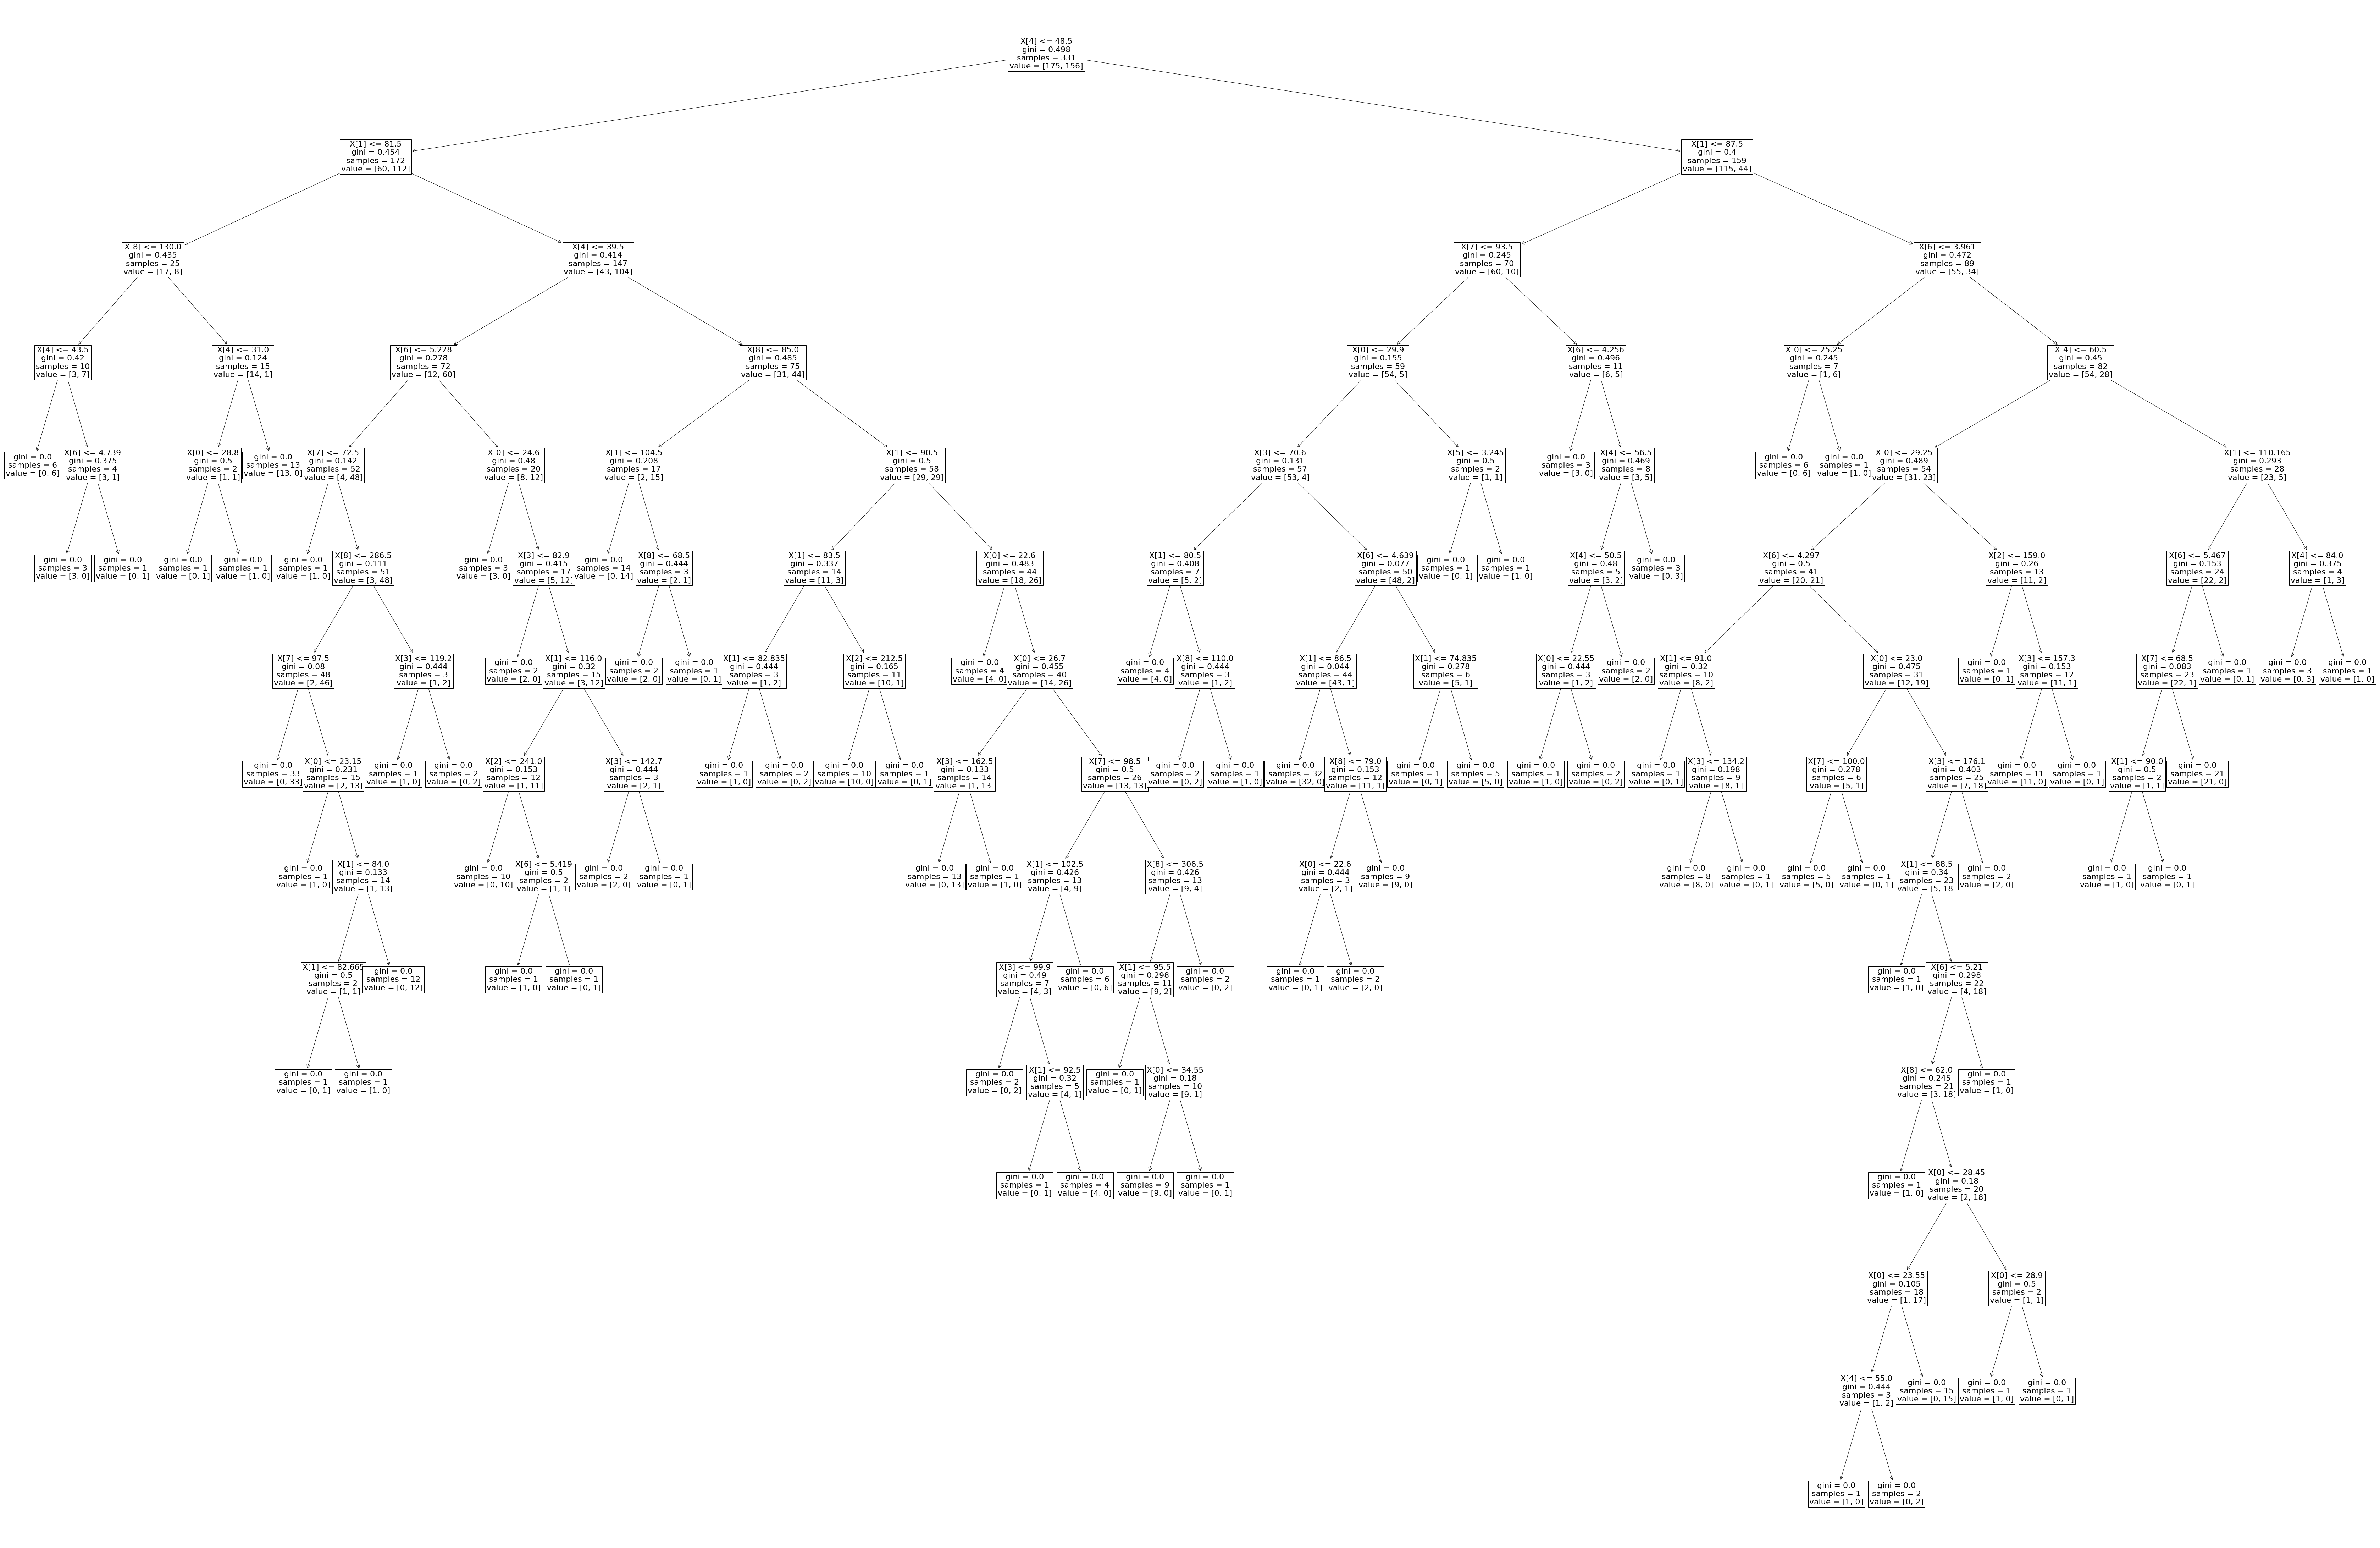

In [253]:
plt.figure(figsize=(120,80))
tree.plot_tree(diabetes_clf_non_tune,fontsize=22)

**Without parameter tuned entropy**

In [ ]:
diabetes_clf_non_tune = DecisionTreeClassifier(random_state=0,criterion='entropy')
diabetes_clf_non_tune.fit(diabetes_X_train,diabetes_y_train)
diabetes_non_tune_pred = diabetes_clf_non_tune.predict(diabetes_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [254]:
confusion_matrix(diabetes_y_test,diabetes_non_tune_pred)
print(f"Micro recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro recall score entropy decision non tuned 0.5855855855855856
Macro recall score entropy decision non tuned 0.5901960784313726
Weighted recall score entropy decision non tuned 0.5855855855855856
None recall score entropy decision non tuned [0.53333333 0.64705882]


In [255]:
print(f"Micro f1 score entropy decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro f1 score entropy decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted f1 score entropy decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None average entropy decision non tuned {f1_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro f1 score entropy decision non tuned 0.5855855855855856
Macro f1 score entropy decision non tuned 0.5855519480519481
Weighted f1 score entropy decision non tuned 0.5852492102492103
None average entropy decision non tuned [0.58181818 0.58928571]


In [256]:
print(f"Micro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro precision score entropy decision non tuned 0.5855855855855856
Macro precision score entropy decision non tuned 0.5904918032786886
Weighted precision score entropy decision non tuned 0.5945059813912273
None precision score entropy decision non tuned [0.64       0.54098361]


In [257]:
print(f"ACCURACY SCORE GINI NON TUNED {accuracy_score(diabetes_y_test,diabetes_non_tune_pred)}")

ACCURACY SCORE GINI NON TUNED 0.5855855855855856


In [258]:
print(f"Micro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro precision score entropy decision non tuned 0.5855855855855856
Macro precision score entropy decision non tuned 0.5904918032786886
Weighted precision score entropy decision non tuned 0.5945059813912273
None precision score entropy decision non tuned [0.64       0.54098361]


[Text(2942.743670886076, 4203.84, 'X[4] <= 48.5\ngini = 0.498\nsamples = 331\nvalue = [175, 156]'),
 Text(1051.5474683544303, 3913.92, 'X[1] <= 81.5\ngini = 0.454\nsamples = 172\nvalue = [60, 112]'),
 Text(423.79746835443035, 3624.0, 'X[8] <= 130.0\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(169.51898734177215, 3334.08, 'X[4] <= 43.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(84.75949367088607, 3044.16, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(254.27848101265823, 3044.16, 'X[6] <= 4.739\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(169.51898734177215, 2754.24, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(339.0379746835443, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.0759493670886, 3334.08, 'X[4] <= 31.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(593.3164556962025, 3044.16, 'X[0] <= 28.8\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(508.55696202531647, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.

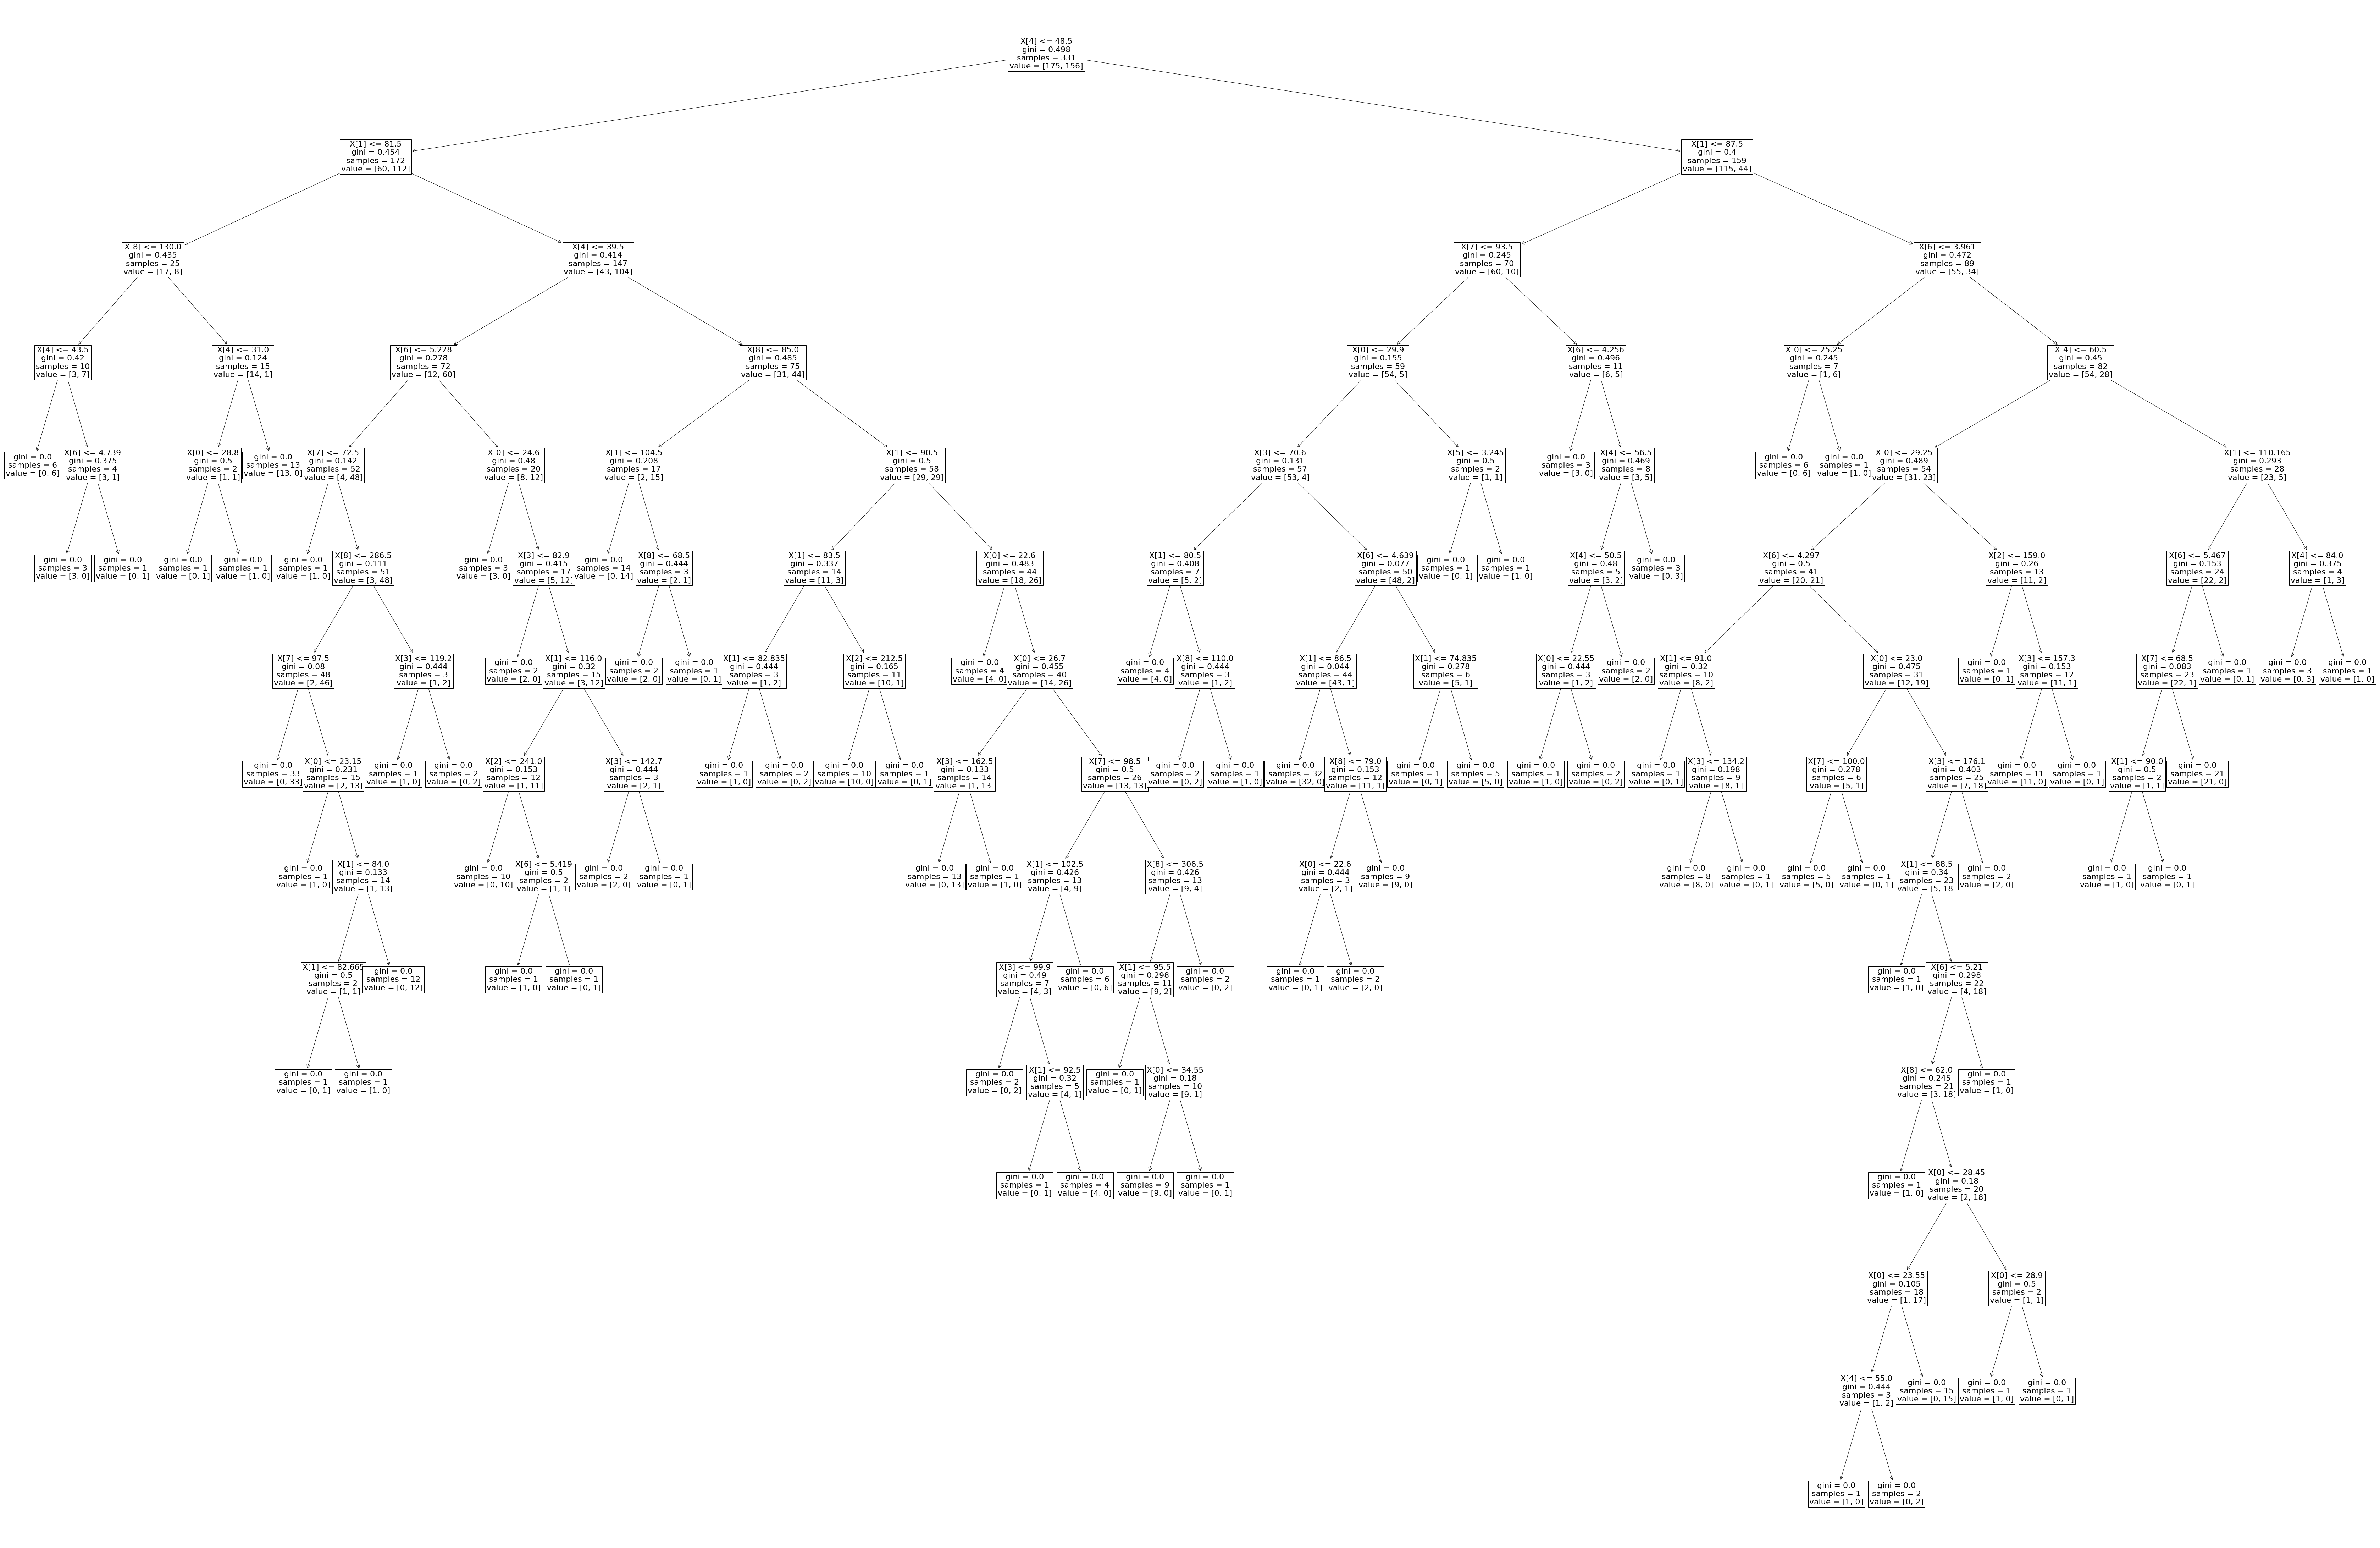

In [259]:
plt.figure(figsize=(120,80))
tree.plot_tree(diabetes_clf_non_tune,fontsize=22)

**Parameter Tuned Gini**

In [260]:
diabetes_clf_tuned = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=100,min_samples_split=3,min_samples_leaf=2,random_state=0,max_leaf_nodes=100)
diabetes_clf_tuned.fit(diabetes_X_train,diabetes_y_train)
diabetes_tune_pred = diabetes_clf_tuned.predict(diabetes_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [261]:
confusion_matrix(diabetes_y_test,diabetes_tune_pred)
print(f"Micro recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average='micro')}")
print(f"Macro recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average='macro')}")
print(f"Weighted recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average='weighted')}")
print(f"None recall score entropy decision non tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average=None)}")

Micro recall score entropy decision non tuned 0.5585585585585585
Macro recall score entropy decision non tuned 0.5549019607843138
Weighted recall score entropy decision non tuned 0.5585585585585585
None recall score entropy decision non tuned [0.6        0.50980392]


In [262]:
print(f"Micro f1 score entropy decision non tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average='micro')}")
print(f"Macro f1 score entropy decision non tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average='macro')}")
print(f"Weighted f1 score entropy decision non tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average='weighted')}")
print(f"None average entropy decision non tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average=None)}")

Micro f1 score entropy decision non tuned 0.5585585585585585
Macro f1 score entropy decision non tuned 0.5549464037312822
Weighted f1 score entropy decision non tuned 0.5581973430758309
None average entropy decision non tuned [0.59504132 0.51485149]


In [263]:
print(f"Micro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='weighted')}")
print(f"None precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average=None)}")

Micro precision score entropy decision non tuned 0.5585585585585585
Macro precision score entropy decision non tuned 0.5550819672131148
Weighted precision score entropy decision non tuned 0.5579264510412051
None precision score entropy decision non tuned [0.59016393 0.52      ]


In [264]:
print(f"ACCURACY SCORE GINI NON TUNED {accuracy_score(diabetes_y_test,diabetes_tune_pred)}")

ACCURACY SCORE GINI NON TUNED 0.5585585585585585


In [265]:
print(f"Micro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='weighted')}")
print(f"None precision score entropy decision non tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average=None)}")

Micro precision score entropy decision non tuned 0.5585585585585585
Macro precision score entropy decision non tuned 0.5550819672131148
Weighted precision score entropy decision non tuned 0.5579264510412051
None precision score entropy decision non tuned [0.59016393 0.52      ]


[Text(2942.743670886076, 4203.84, 'X[4] <= 48.5\ngini = 0.498\nsamples = 331\nvalue = [175, 156]'),
 Text(1051.5474683544303, 3913.92, 'X[1] <= 81.5\ngini = 0.454\nsamples = 172\nvalue = [60, 112]'),
 Text(423.79746835443035, 3624.0, 'X[8] <= 130.0\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(169.51898734177215, 3334.08, 'X[4] <= 43.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(84.75949367088607, 3044.16, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(254.27848101265823, 3044.16, 'X[6] <= 4.739\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(169.51898734177215, 2754.24, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(339.0379746835443, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.0759493670886, 3334.08, 'X[4] <= 31.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(593.3164556962025, 3044.16, 'X[0] <= 28.8\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(508.55696202531647, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.

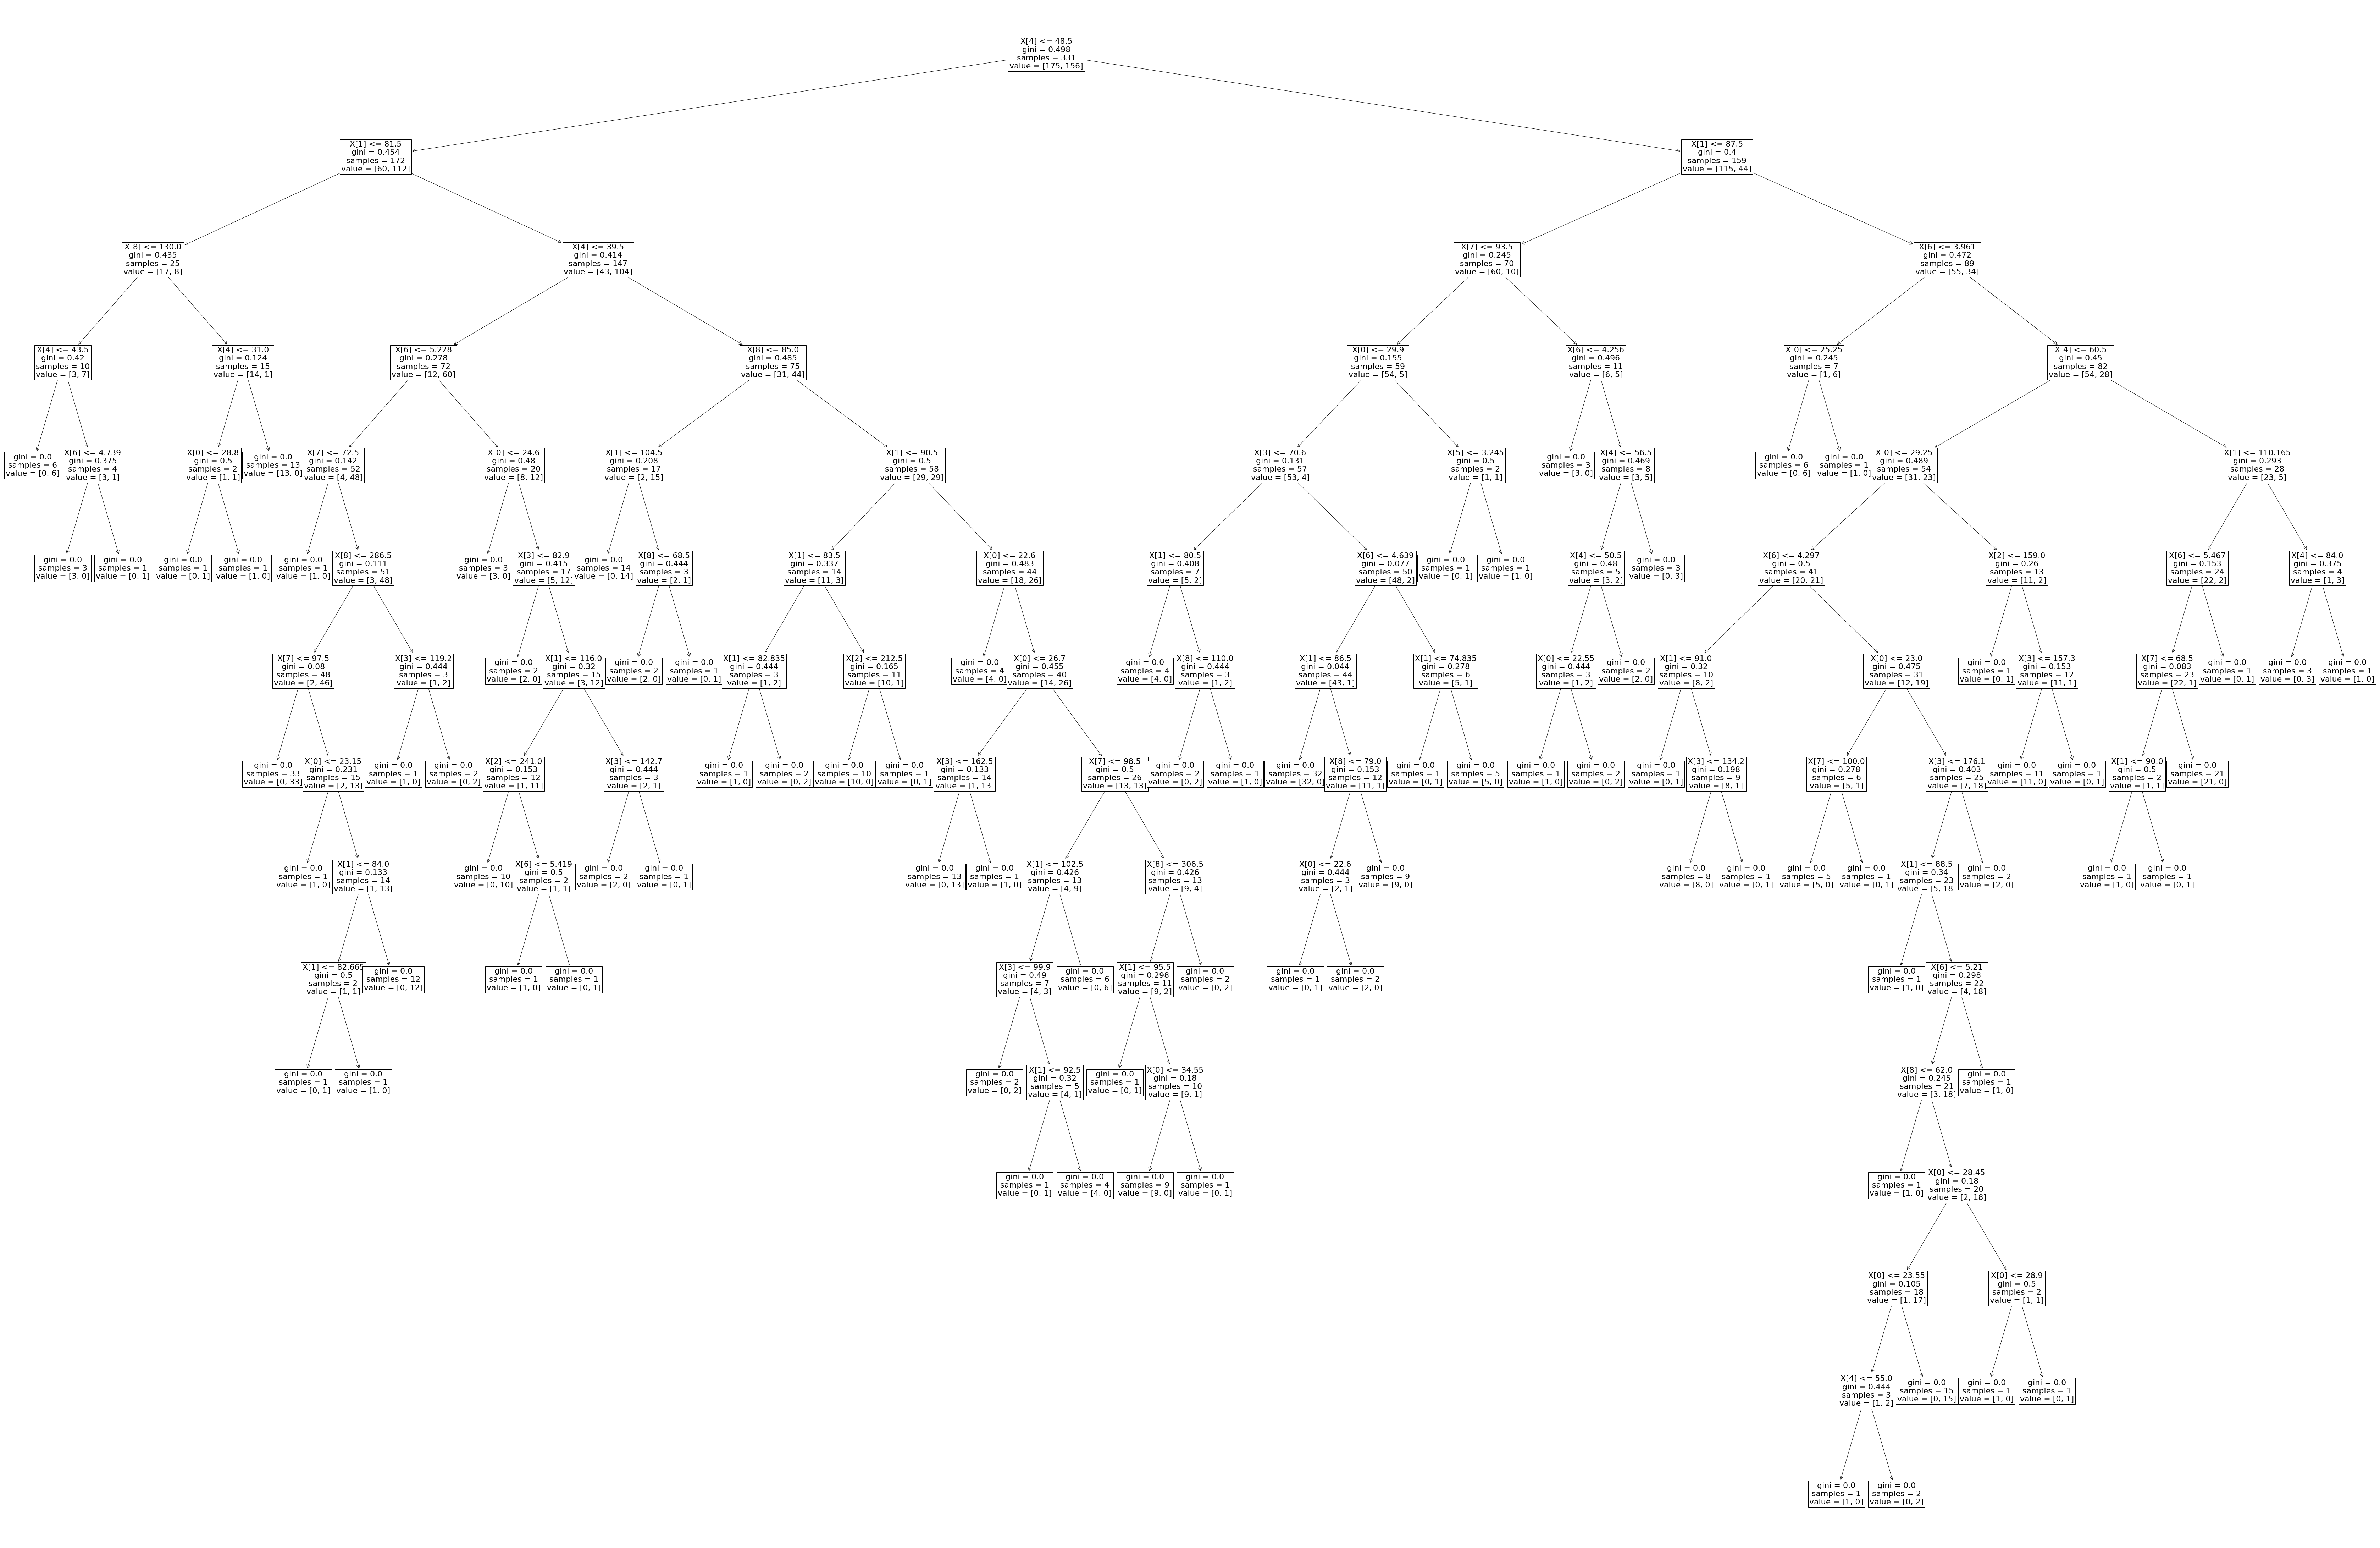

In [266]:
plt.figure(figsize=(120,80))
tree.plot_tree(diabetes_clf_non_tune,fontsize=22)

**Parameter tuned entropy**

In [267]:
diabetes_clf_tuned = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=100,min_samples_split=3,min_samples_leaf=2,random_state=0,max_leaf_nodes=100)
diabetes_clf_tuned.fit(diabetes_X_train,diabetes_y_train)
diabetes_tune_pred = diabetes_clf_tuned.predict(diabetes_X_test)

Metrics:- Confusion matrix,recall score,f1 score,accuracy,precision score

In [271]:
confusion_matrix(diabetes_y_test,diabetes_tune_pred)
print(f"Micro recall score entropy decision tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average='micro')}")
print(f"Macro recall score entropy decision tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average='macro')}")
print(f"Weighted recall score entropy decision tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average='weighted')}")
print(f"None recall score entropy decision tuned {recall_score(diabetes_y_test,diabetes_tune_pred,average=None)}")

Micro recall score entropy decision tuned 0.5765765765765766
Macro recall score entropy decision tuned 0.5686274509803921
Weighted recall score entropy decision tuned 0.5765765765765766
None recall score entropy decision tuned [0.66666667 0.47058824]


In [272]:
print(f"Micro f1 score entropy decision tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average='micro')}")
print(f"Macro f1 score entropy decision tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average='macro')}")
print(f"Weighted f1 score entropy decision tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average='weighted')}")
print(f"None average entropy decision tuned {f1_score(diabetes_y_test,diabetes_tune_pred,average=None)}")

Micro f1 score entropy decision tuned 0.5765765765765766
Macro f1 score entropy decision tuned 0.5675922088686283
Weighted f1 score entropy decision tuned 0.5726459157043491
None average entropy decision tuned [0.62992126 0.50526316]


In [273]:
print(f"Micro precision score entropy decision tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='micro')}")
print(f"Macro precision score entropy decision tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='macro')}")
print(f"Weighted precision score entropy decision tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average='weighted')}")
print(f"None precision score entropy decision tuned {precision_score(diabetes_y_test,diabetes_tune_pred,average=None)}")

Micro precision score entropy decision tuned 0.5765765765765766
Macro precision score entropy decision tuned 0.5712347354138398
Weighted precision score entropy decision tuned 0.5733250210862151
None precision score entropy decision tuned [0.59701493 0.54545455]


In [274]:
print(f"ACCURACY SCORE ENTROPY TUNED {accuracy_score(diabetes_y_test,diabetes_non_tune_pred)}")


ACCURACY SCORE ENTROPY TUNED 0.5855855855855856


In [275]:
print(f"Micro precision score gini decision tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='micro')}")
print(f"Macro precision score gini decision tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='macro')}")
print(f"Weighted precision score gini decision tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average='weighted')}")
print(f"None precision score gini decision tuned {precision_score(diabetes_y_test,diabetes_non_tune_pred,average=None)}")

Micro precision score gini decision tuned 0.5855855855855856
Macro precision score gini decision tuned 0.5904918032786886
Weighted precision score gini decision tuned 0.5945059813912273
None precision score gini decision tuned [0.64       0.54098361]


[Text(2942.743670886076, 4203.84, 'X[4] <= 48.5\ngini = 0.498\nsamples = 331\nvalue = [175, 156]'),
 Text(1051.5474683544303, 3913.92, 'X[1] <= 81.5\ngini = 0.454\nsamples = 172\nvalue = [60, 112]'),
 Text(423.79746835443035, 3624.0, 'X[8] <= 130.0\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(169.51898734177215, 3334.08, 'X[4] <= 43.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(84.75949367088607, 3044.16, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(254.27848101265823, 3044.16, 'X[6] <= 4.739\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(169.51898734177215, 2754.24, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(339.0379746835443, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.0759493670886, 3334.08, 'X[4] <= 31.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(593.3164556962025, 3044.16, 'X[0] <= 28.8\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(508.55696202531647, 2754.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(678.

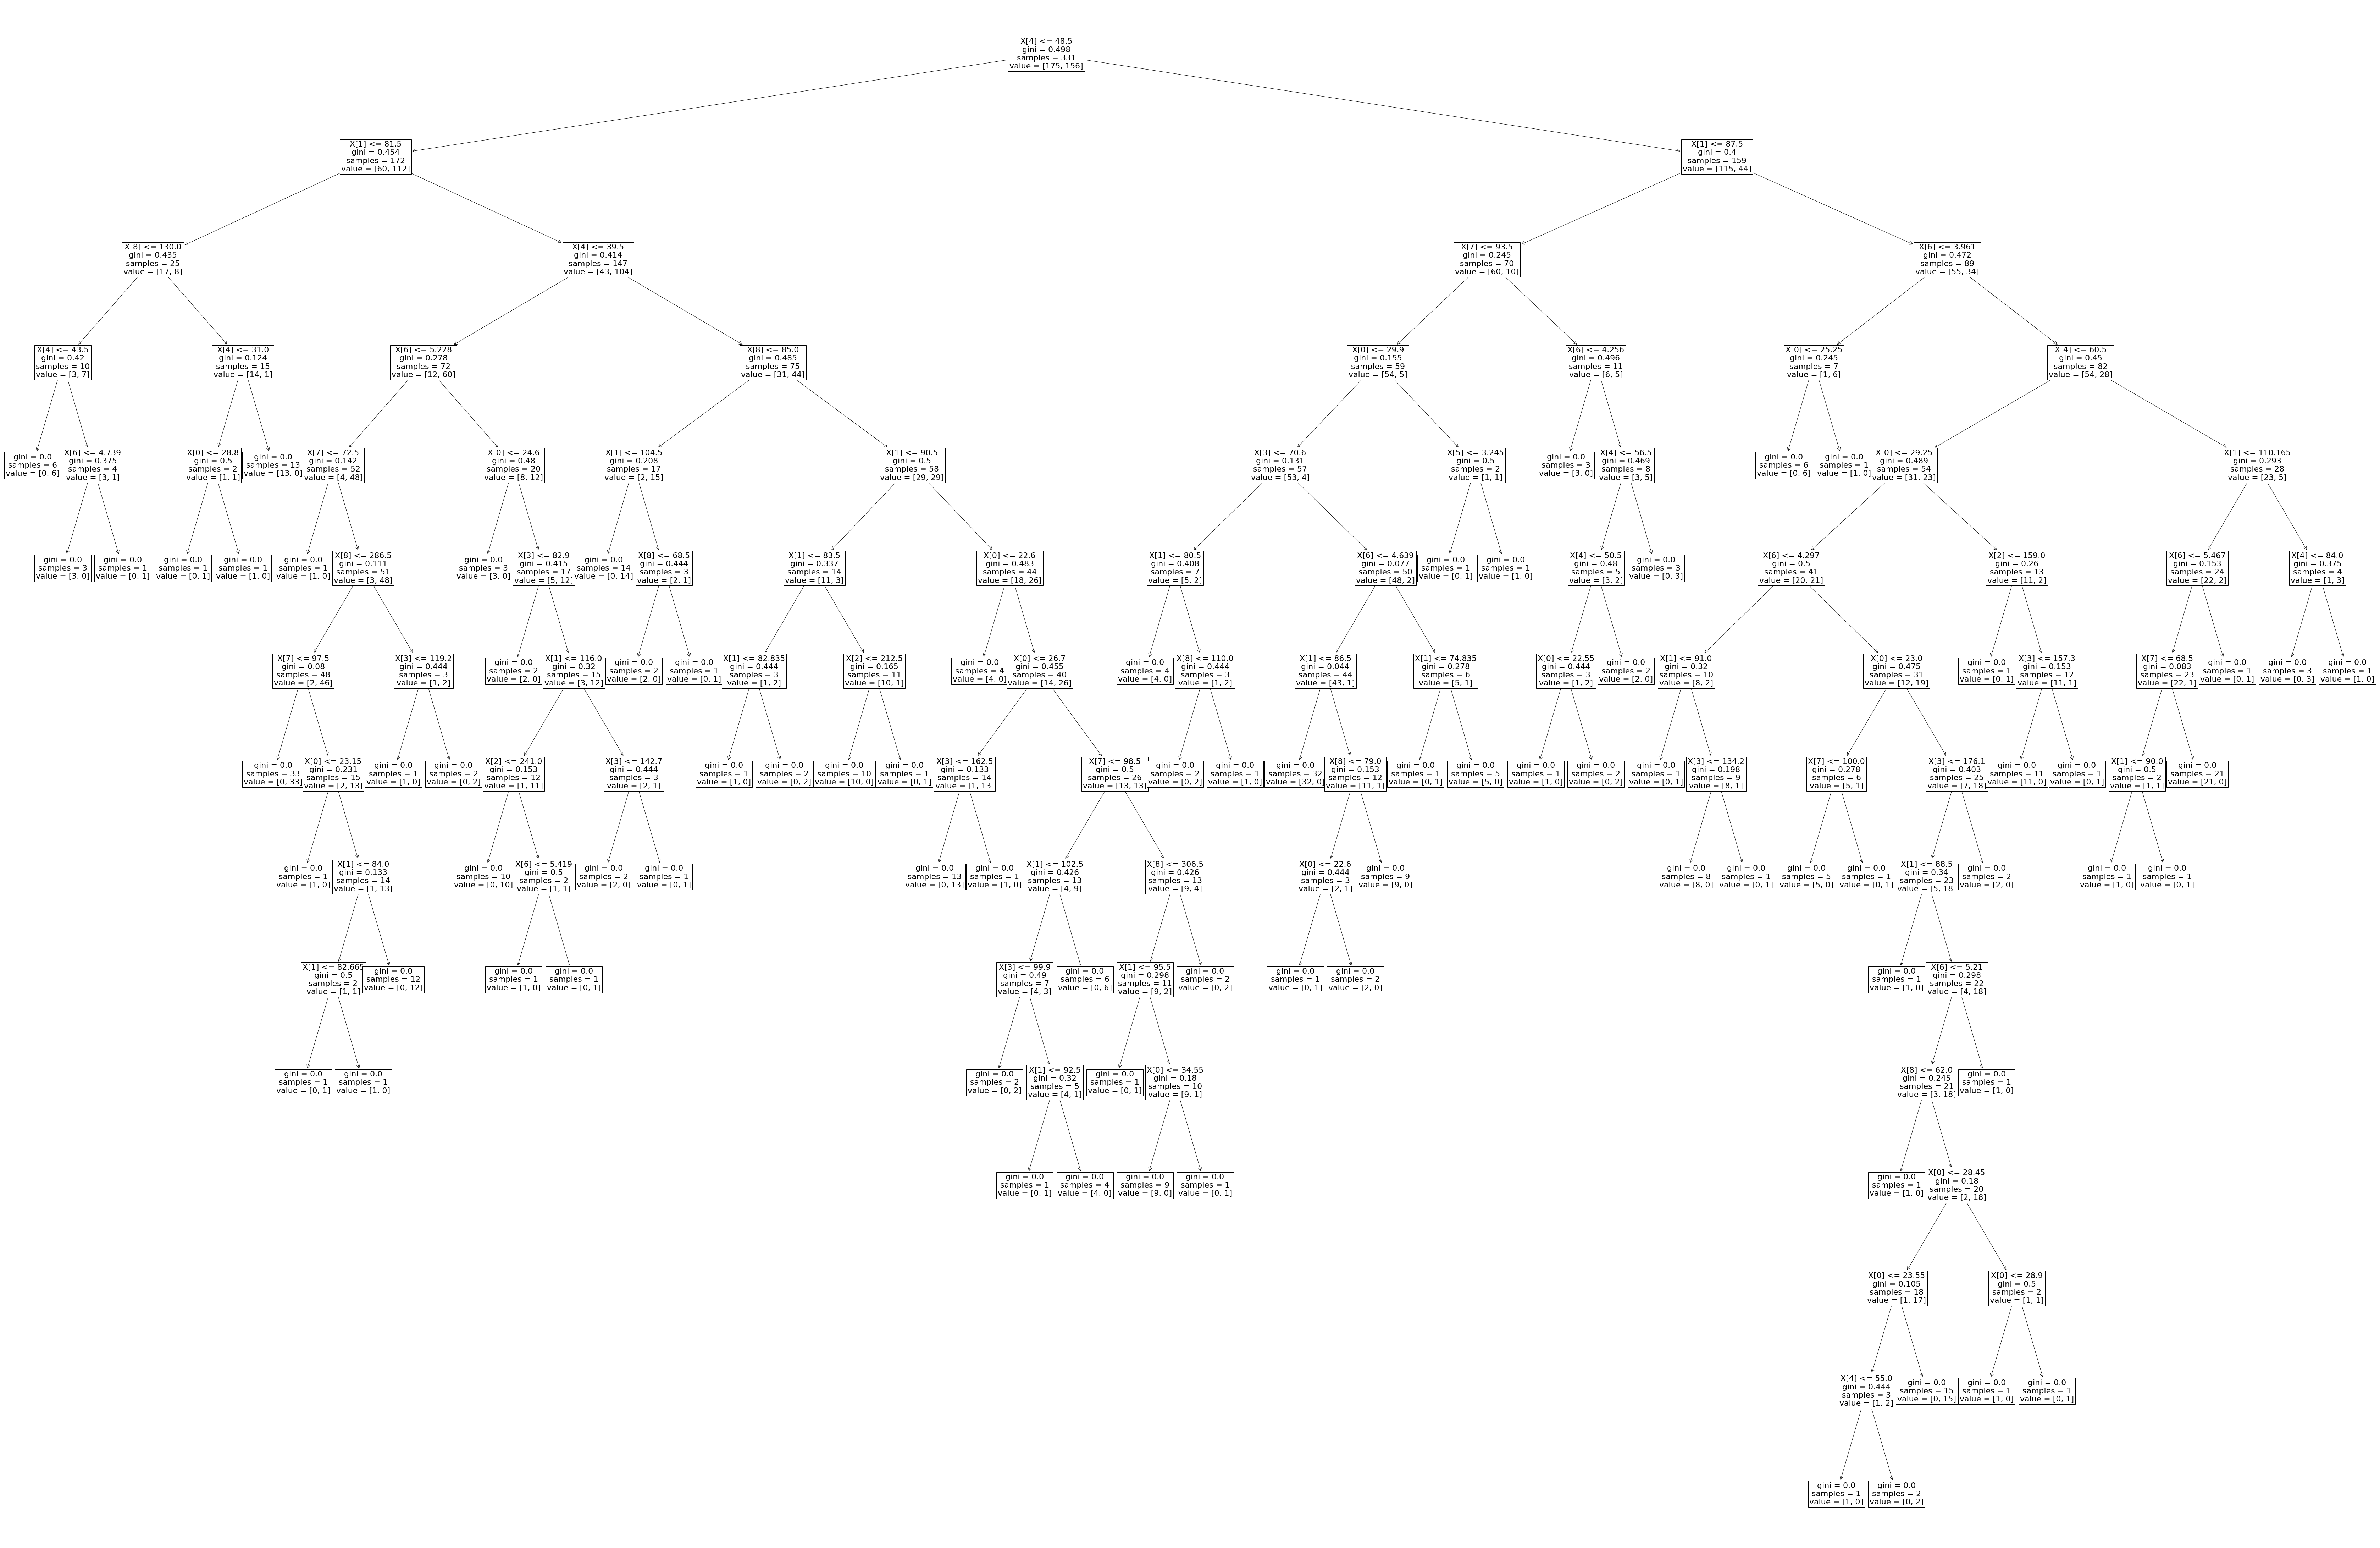

In [276]:
plt.figure(figsize=(120,80))
tree.plot_tree(diabetes_clf_non_tune,fontsize=22)